# Análisis Exploratorio

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Set seeds for reproducibility
np.random.seed(2024)
seed = 2024

C:\Users\euroc\AppData\Local\Temp\ipykernel_14112\2772652807.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Load the data
df_2011 = pd.read_csv('data/2011.csv')
df_2013 = pd.read_csv('data/2013.csv')
df_2014 = pd.read_csv('data/2014.csv')
df_2016 = pd.read_csv('data/2016.csv')
df_2017 = pd.read_csv('data/2017.csv')
df_2018 = pd.read_csv('data/2018.csv')
df_2019 = pd.read_csv('data/2019.csv')
df_2020 = pd.read_csv('data/2020.csv')
df_2022 = pd.read_csv('data/2022.csv')

In [4]:
# Concatenate the data with only the columns that are present in the df_2011
df = pd.concat([
    df_2011,
    df_2013,
    df_2014,
    df_2016,
    df_2017,
    df_2018,
    df_2019,
    df_2020,
    df_2022
], axis=0, ignore_index=True)

In [4]:
df.head()

,dia_ocu,mes_ocu,dia_sem_ocu,hora_ocu,depto_ocu,zona_ocu,sexo_pil,edad_pil,mayor_menor,estado_pil,tipo_vehi,marca_vehi,causa_acc,year
0,27,Junio,Lunes,17,Guatemala,10,Hombre,42,Mayor,Normal,Automovil,Audi,Colisión,2011
1,18,Septiembre,Domingo,0,Guatemala,7,Hombre,25,Mayor,Ebrio,Automovil,Audi,Empotro,2011
2,5,Octubre,Miercoles,19,Quetzaltenango,Ignorado,Hombre,26,Mayor,Ebrio,Automovil,Audi,Colisión,2011
3,15,Febrero,Martes,12,Izabal,Ignorado,Hombre,59,Mayor,Ignorado,Camioneta,Land rover,Colisión,2011
4,17,Junio,Viernes,18,Guatemala,11,Mujer,25,Mayor,Normal,Camioneta,Land rover,Colisión,2011


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76792 entries, 0 to 76791
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   dia_ocu      76792 non-null  int64 
 1   mes_ocu      76792 non-null  object
 2   dia_sem_ocu  76792 non-null  object
 3   hora_ocu     76792 non-null  object
 4   depto_ocu    76792 non-null  object
 5   zona_ocu     76792 non-null  object
 6   sexo_pil     76792 non-null  object
 7   edad_pil     76792 non-null  object
 8   mayor_menor  76792 non-null  object
 9   estado_pil   76792 non-null  object
 10  tipo_vehi    76792 non-null  object
 11  marca_vehi   76792 non-null  object
 12  causa_acc    76792 non-null  object
 13  year         76792 non-null  int64 
dtypes: int64(2), object(12)
memory usage: 8.2+ MB


In [5]:
# Separate numerical and categorical columns
numerical = df.select_dtypes(include=['int64', 'float64']).columns
categorical = df.select_dtypes(include=['object']).columns

In [6]:
# Numerical NA's
df[numerical].isna().sum()

dia_ocu    0
year       0
dtype: int64

Dada la naturaleza con la que la información fue recolectada, los datos no son consistentes en cuanto a sus mayúsculas y minúsculas. Tampoco se tienen valores nulos, si no que aparecen como "ignorado", por lo que es necesario su tratamiento.

In [7]:
# To lower Case
df[categorical] = df[categorical].apply(lambda x: x.str.lower())

## Estudio de las variables cuantitativas mediante técnicas de estadística descriptiva

In [8]:
#Estadísticas descriptiva de las variables cuantitativas
cuantiatives = ['dia_ocu', 'hora_ocu', 'edad_pil', 'year']
statdisticSummary = df[cuantiatives].describe()

print(statdisticSummary)

            dia_ocu          year
count  76792.000000  76792.000000
mean      15.623008   2017.397528
std        8.806384      2.890603
min        1.000000   2011.000000
25%        8.000000   2016.000000
50%       16.000000   2018.000000
75%       23.000000   2020.000000
max       31.000000   2022.000000


## Corrección de variables

In [10]:
# Categorical variables
for col in categorical:
    # Print them sorted
    print(df[col].value_counts().sort_index())

mes_ocu
abril         6583
agosto        6484
diciembre     6612
enero         6646
febrero       6603
julio         6330
junio         6206
marzo         7090
mayo          6466
noviembre     5841
octubre       5500
septiembre    5767
septiemre      664
Name: count, dtype: int64
dia_sem_ocu
domingo      13992
jueves        9648
lunes        10108
martes        8836
miercoles     3629
miércoles     5309
sabado        5557
sábado        8780
viernes      10933
Name: count, dtype: int64
hora_ocu
0           1098
1            714
10           662
11           774
12           719
13           759
14           863
15           997
16           912
17          1189
18          1261
19          1463
2            527
20          1437
21          1414
22          1254
23          1115
3            408
4            291
5            414
6            543
7            702
8            645
9            608
ignorada      15
Name: count, dtype: int64
depto_ocu
alta verapaz       2933
alta verpaz     

Muchos datos están inconsistentes por culpa de las tíldes, por lo que se procede a corregirlos.

In [9]:
accented_vowels = {
    'á': 'a',
    'é': 'e',
    'í': 'i',
    'ó': 'o',
    'ú': 'u',
    'Á': 'A',
    'É': 'E',
    'Í': 'I',
    'Ó': 'O',
    'Ú': 'U'
}

df.replace(accented_vowels, regex=True, inplace=True)

# Replace all 'ignorada' and 'ignorado' with 'NA' in the categorical columns
df[categorical] = df[categorical].replace(['ignorada', 'ignorado'], np.nan)

También algunos están mal escritos

In [10]:
df['depto_ocu'] = df['depto_ocu'].replace('alta verpaz', 'alta verapaz')
df['mes_ocu'] = df['mes_ocu'].replace('septiemre', 'septiembre')
df['causa_acc'] = df['causa_acc'].replace('volco', 'vuelco')
df['tipo_vehi'] = df['tipo_vehi'].replace('moto taxi', 'mototaxi')
# df['causa_acc'] = df['causa_acc'].replace('choque', 'colision')

Existen algunos valores en _estado\_pil_ con valor numérico. En base al diccionario de variables proveído por el INE, son cambiados

In [11]:
df['estado_pil'] = df['estado_pil'].replace(['1', '2', '3', '4', '5', '6', '7', '8', '9'], 'ebrio')
df['estado_pil'] = df['estado_pil'].replace(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19'], 'no ebrio')
df['estado_pil'] = df['estado_pil'].replace('normal', 'no ebrio')

In [14]:
# Categorical variables
for col in categorical:
    # Print them sorted
    print(df[col].value_counts().sort_index())

mes_ocu
abril         6583
agosto        6484
diciembre     6612
enero         6646
febrero       6603
julio         6330
junio         6206
marzo         7090
mayo          6466
noviembre     5841
octubre       5500
septiembre    6431
Name: count, dtype: int64
dia_sem_ocu
domingo      13992
jueves        9648
lunes        10108
martes        8836
miercoles     8938
sabado       14337
viernes      10933
Name: count, dtype: int64
hora_ocu
0     1098
1      714
10     662
11     774
12     719
13     759
14     863
15     997
16     912
17    1189
18    1261
19    1463
2      527
20    1437
21    1414
22    1254
23    1115
3      408
4      291
5      414
6      543
7      702
8      645
9      608
Name: count, dtype: int64
depto_ocu
alta verapaz       3006
baja verapaz       1328
chimaltenango      2866
chiquimula         1652
el progreso        1780
escuintla          6055
guatemala         30020
huehuetenango      1546
izabal             2689
jalapa             1136
jutiapa           

Arreglando los valores nulos, se convierten en columnas numéricas

In [12]:
import numpy as np

df['hora_ocu'] = df['hora_ocu'].replace('NA', np.nan).astype(float)
df['zona_ocu'] = df['zona_ocu'].replace('NA', np.nan).astype(float)
df['edad_pil'] = df['edad_pil'].replace('NA', np.nan).astype(float)

categorical = categorical.drop(['hora_ocu', 'zona_ocu', 'edad_pil'])
numerical = numerical.append(pd.Index(['hora_ocu', 'zona_ocu', 'edad_pil']))

## Análisis de variables

### Ajuste de valores nulos

In [13]:
df[categorical].isnull().sum()

mes_ocu            0
dia_sem_ocu        0
depto_ocu          0
sexo_pil        9603
mayor_menor    12572
estado_pil     45844
tipo_vehi       4247
marca_vehi     21676
causa_acc         27
dtype: int64

In [14]:
df[numerical].isnull().sum()

dia_ocu         0
year            0
hora_ocu    56023
zona_ocu    56425
edad_pil    16871
dtype: int64

#### Categóricas
- _mayor\_menor_: Si la edad es menor a 18 años, se considerará menor, de lo contrario, mayor.
- _sexo\_pil_: los valores nulos serán seleccionados aleatoriamente.
- _estado\_pil_: los valores no especificados se representarán en una nueva categoría.
- _marca\_vehi_: los valores nulos se representarán en una nueva categoría.
- _tipo\_vehi_: los valores nulos serán seleccionados aleatoriamente.
- _causa\_acc_: se eliminará esas observaciones al no ser una cantidad de datos relevantes.

#### Numéricas
- _hora\_ocu_: los valores nulos serán reemplazados por la moda y será representado por una nueva columna.
- _zona\_ocu_: esta característica no es relevante para el análisis y contiene una cantidad significativa de datos nulos; por lo que se eliminará.
- _edad\_pil_: los valores nulos serán reemplazados por la mediana y será representado por una nueva columna.

In [15]:
# Categorical variables
df['mayor_menor'] = np.where(df['edad_pil'] < 18, 'menor', 'mayor')

df['sexo_pil'] = df['sexo_pil'].fillna(
    df['sexo_pil'].sample(frac=1, random_state=seed).iloc[0]
)

df['estado_pil'] = df['estado_pil'].fillna('no especificado')

df['marca_vehi'] = df['marca_vehi'].fillna('no especificado')

df['tipo_vehi'] = df['tipo_vehi'].fillna(
    df['tipo_vehi'].sample(frac=1, random_state=seed).iloc[0]
)

df = df.dropna(subset=['causa_acc'])

# Numerical variables
df = df.drop(columns=['zona_ocu'])
numerical = numerical.drop('zona_ocu')

df['hora_ocu_missing'] = df['hora_ocu'].isna().astype(str)
categorical = categorical.append(pd.Index(['hora_ocu_missing']))
df['hora_ocu'] = df['hora_ocu'].fillna(df['hora_ocu'].mode()[0])

df['edad_pil_missing'] = df['edad_pil'].isna().astype(str)
categorical = categorical.append(pd.Index(['edad_pil_missing']))
df['edad_pil'] = df['edad_pil'].fillna(df['edad_pil'].median())

### Distribución de las variables
#### Categóricas

In [19]:
# for col in categorical:
#     plt.figure(figsize=(10, 5))
#     sns.countplot(data=df, y=col, order=df[col].value_counts().index)
#     plt.title(f'Distribución de {col}')
#     plt.show()
#     print(df[col].value_counts(normalize=True).sort_values(ascending=False))

#### Numéricas

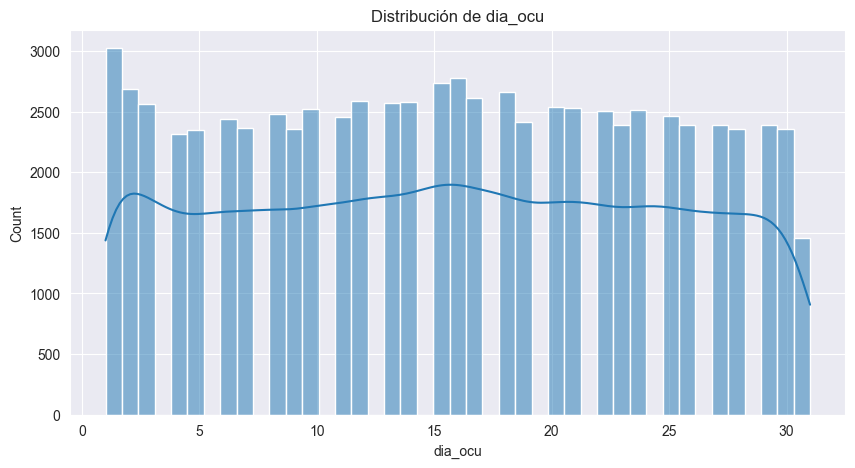

count    76765.000000
mean        15.623162
std          8.806435
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: dia_ocu, dtype: float64


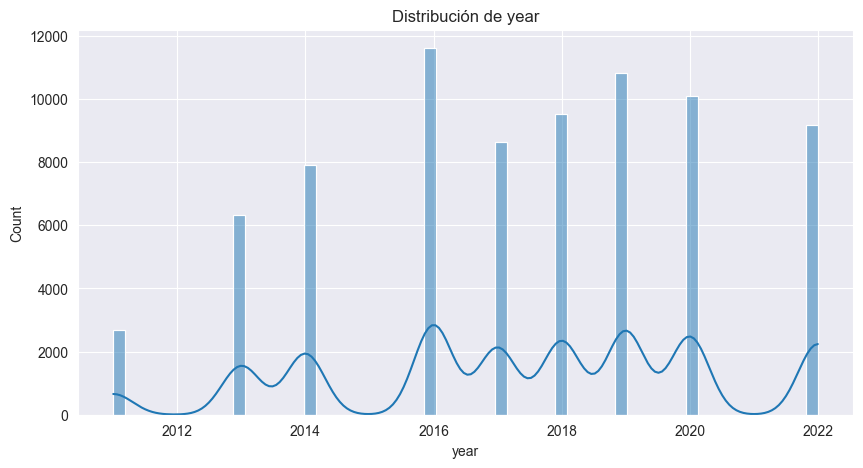

count    76765.000000
mean      2017.398411
std          2.890289
min       2011.000000
25%       2016.000000
50%       2018.000000
75%       2020.000000
max       2022.000000
Name: year, dtype: float64


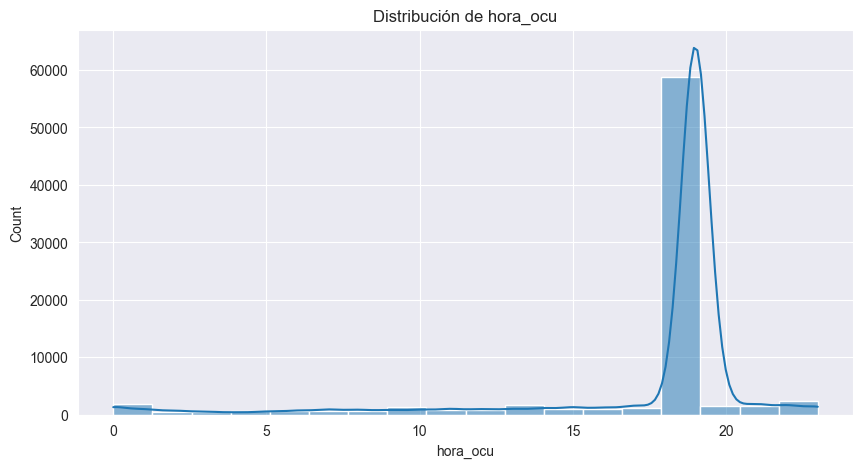

count    76765.000000
mean        17.542448
std          4.350162
min          0.000000
25%         19.000000
50%         19.000000
75%         19.000000
max         23.000000
Name: hora_ocu, dtype: float64


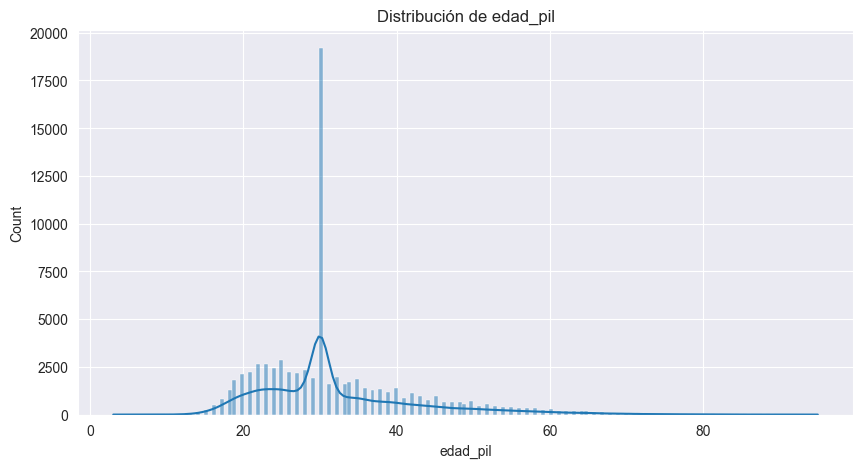

count    76765.000000
mean        32.273067
std         10.743334
min          3.000000
25%         25.000000
50%         30.000000
75%         36.000000
max         95.000000
Name: edad_pil, dtype: float64


In [20]:
for col in numerical:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()
    print(df[col].describe())

#### Categóricas y numéricas

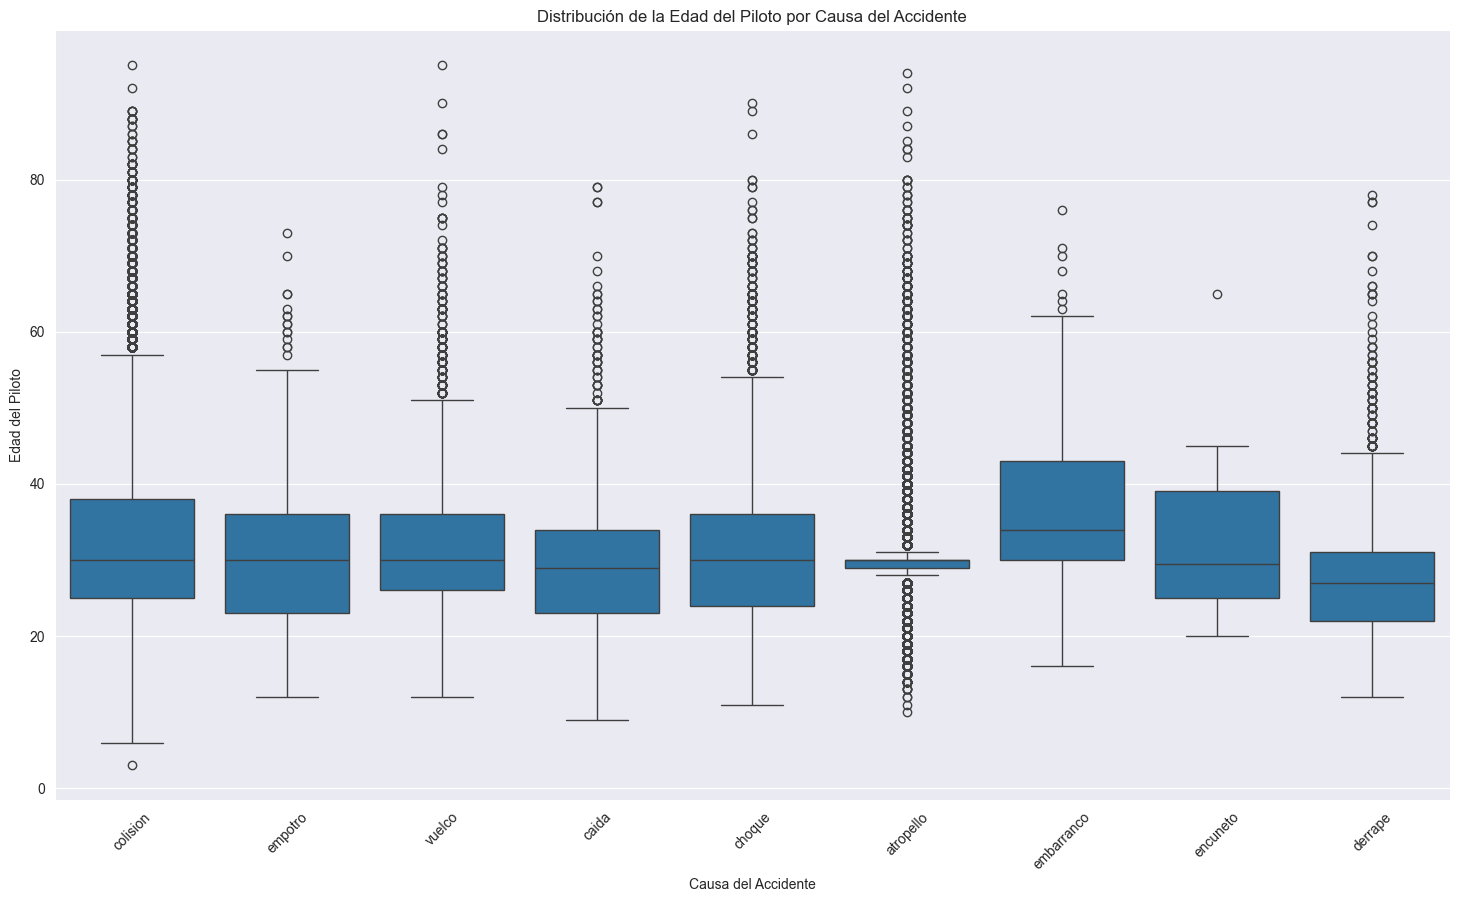

In [21]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=df, x='causa_acc', y='edad_pil')
plt.xticks(rotation=45)
plt.title('Distribución de la Edad del Piloto por Causa del Accidente')
plt.xlabel('Causa del Accidente')
plt.ylabel('Edad del Piloto')
plt.show()

### Cruce de variables

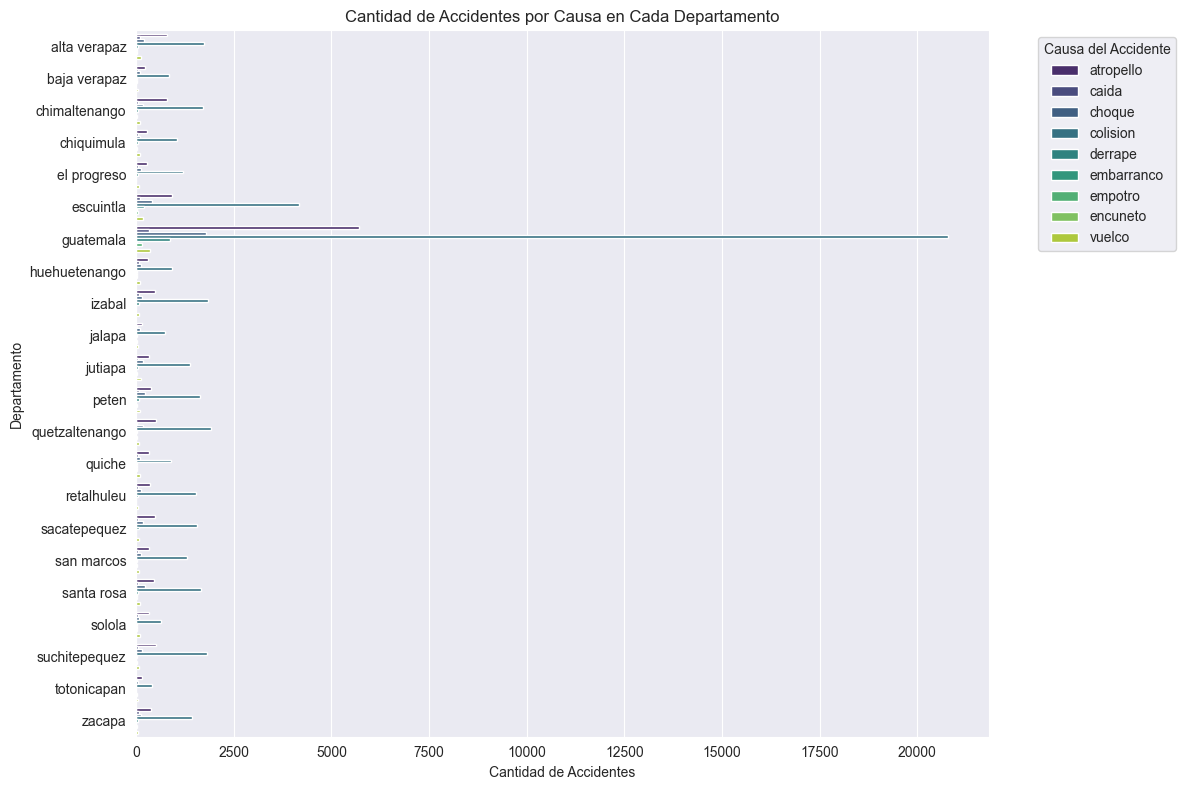

In [22]:
# Categorical variables
data_para_grafico = df.groupby(['depto_ocu', 'causa_acc']).size().reset_index(name='cantidad')

plt.figure(figsize=(12, 8))
sns.barplot(data=data_para_grafico, x='cantidad', y='depto_ocu', hue='causa_acc', dodge=True, palette='viridis')
plt.title('Cantidad de Accidentes por Causa en Cada Departamento')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Departamento')
plt.legend(title='Causa del Accidente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

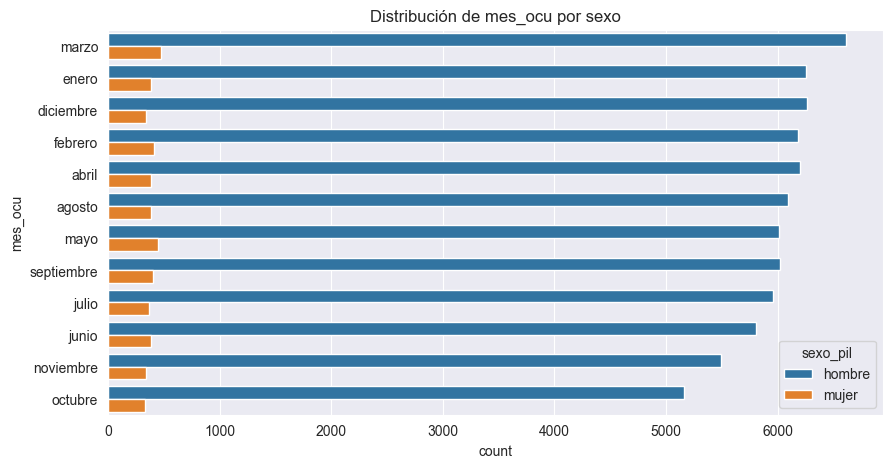

mes_ocu     sexo_pil
abril       hombre      0.941668
            mujer       0.058332
agosto      hombre      0.940460
            mujer       0.059540
diciembre   hombre      0.948085
            mujer       0.051915
enero       hombre      0.941619
            mujer       0.058381
febrero     hombre      0.936847
            mujer       0.063153
julio       hombre      0.941362
            mujer       0.058638
junio       hombre      0.938015
            mujer       0.061985
marzo       hombre      0.933117
            mujer       0.066883
mayo        hombre      0.930848
            mujer       0.069152
noviembre   hombre      0.940935
            mujer       0.059065
octubre     hombre      0.939069
            mujer       0.060931
septiembre  hombre      0.936713
            mujer       0.063287
Name: proportion, dtype: float64


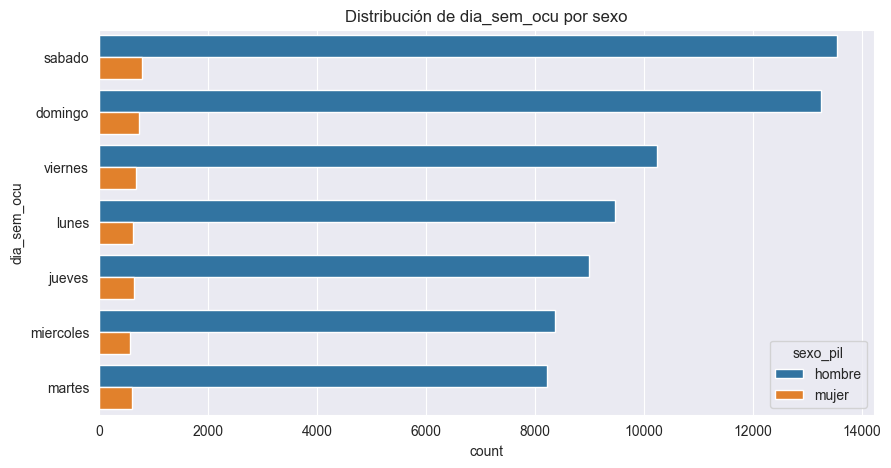

dia_sem_ocu  sexo_pil
domingo      hombre      0.947316
             mujer       0.052684
jueves       hombre      0.932601
             mujer       0.067399
lunes        hombre      0.937457
             mujer       0.062543
martes       hombre      0.931679
             mujer       0.068321
miercoles    hombre      0.936318
             mujer       0.063682
sabado       hombre      0.944127
             mujer       0.055873
viernes      hombre      0.936962
             mujer       0.063038
Name: proportion, dtype: float64


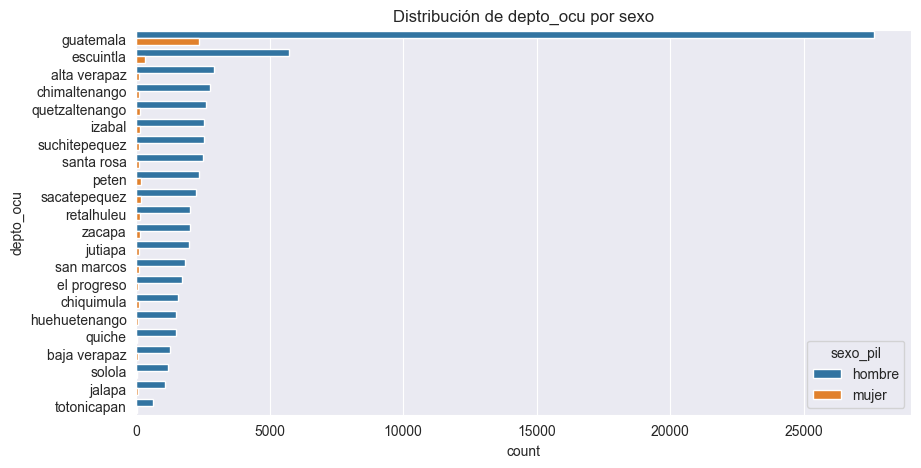

depto_ocu       sexo_pil
alta verapaz    hombre      0.966733
                mujer       0.033267
baja verapaz    hombre      0.938206
                mujer       0.061794
chimaltenango   hombre      0.962291
                mujer       0.037709
chiquimula      hombre      0.941889
                mujer       0.058111
el progreso     hombre      0.956717
                mujer       0.043283
escuintla       hombre      0.947647
                mujer       0.052353
guatemala       hombre      0.921682
                mujer       0.078318
huehuetenango   hombre      0.956016
                mujer       0.043984
izabal          hombre      0.944217
                mujer       0.055783
jalapa          hombre      0.944493
                mujer       0.055507
jutiapa         hombre      0.948596
                mujer       0.051404
peten           hombre      0.934808
                mujer       0.065192
quetzaltenango  hombre      0.946545
                mujer       0.053455
quiche       

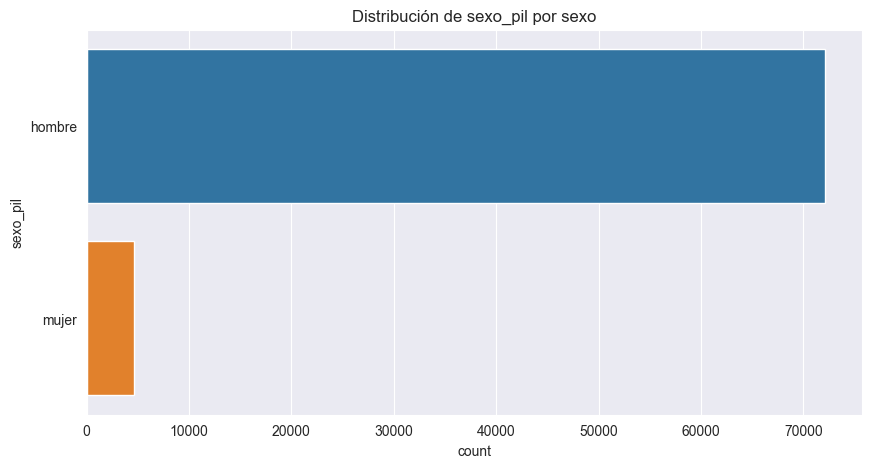

sexo_pil
hombre    1.0
mujer     1.0
Name: proportion, dtype: float64


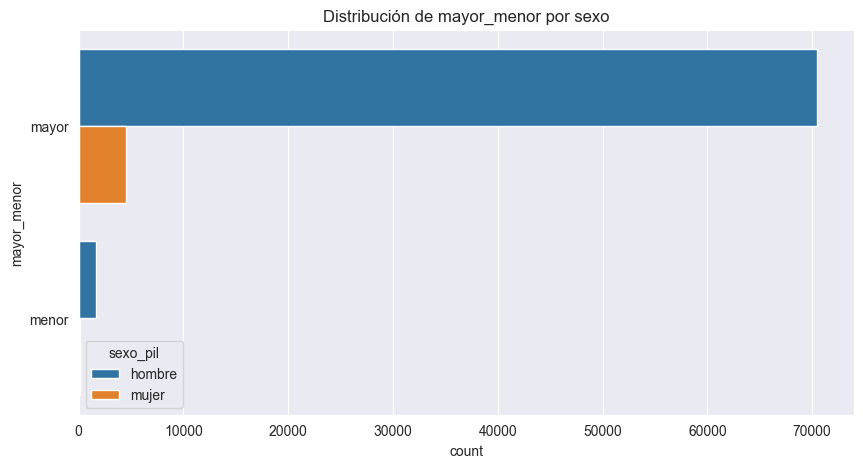

mayor_menor  sexo_pil
mayor        hombre      0.939776
             mujer       0.060224
menor        hombre      0.907786
             mujer       0.092214
Name: proportion, dtype: float64


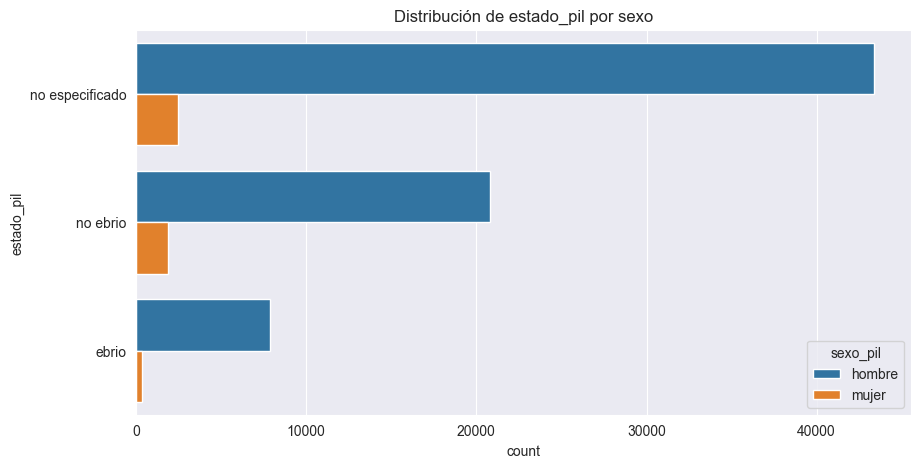

estado_pil       sexo_pil
ebrio            hombre      0.956048
                 mujer       0.043952
no ebrio         hombre      0.917269
                 mujer       0.082731
no especificado  hombre      0.946724
                 mujer       0.053276
Name: proportion, dtype: float64


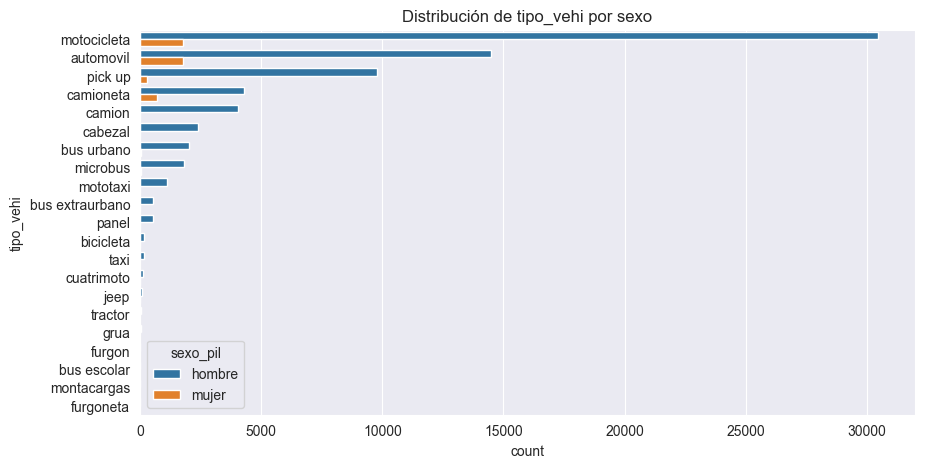

tipo_vehi        sexo_pil
automovil        hombre      0.891433
                 mujer       0.108567
bicicleta        hombre      0.960000
                 mujer       0.040000
bus escolar      hombre      1.000000
bus extraurbano  hombre      0.994565
                 mujer       0.005435
bus urbano       hombre      0.990727
                 mujer       0.009273
cabezal          hombre      0.996650
                 mujer       0.003350
camion           hombre      0.996074
                 mujer       0.003926
camioneta        hombre      0.857542
                 mujer       0.142458
cuatrimoto       hombre      0.900763
                 mujer       0.099237
furgon           hombre      1.000000
furgoneta        hombre      1.000000
grua             hombre      1.000000
jeep             hombre      0.969072
                 mujer       0.030928
microbus         hombre      0.972900
                 mujer       0.027100
montacargas      hombre      1.000000
motocicleta      hombre 

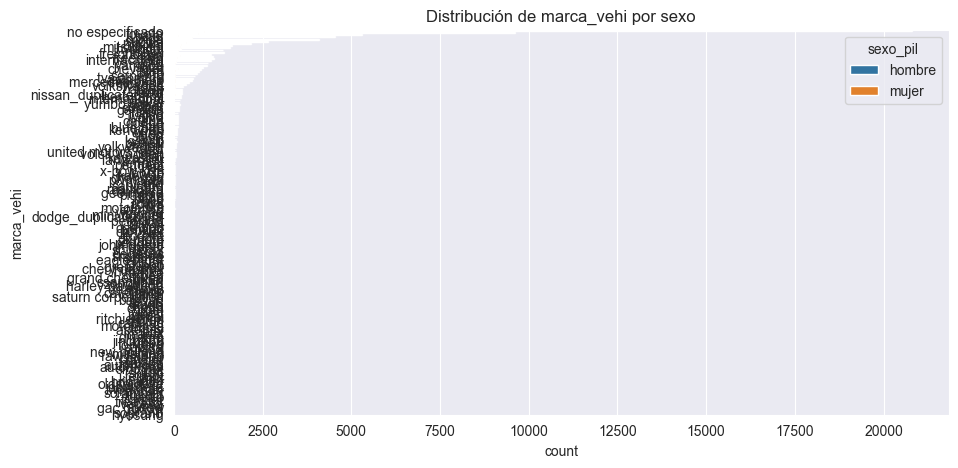

marca_vehi   sexo_pil
acura        hombre      0.809524
             mujer       0.190476
ahm          hombre      0.935484
             mujer       0.064516
ape city     hombre      1.000000
                           ...   
yumbo dakar  hombre      0.830688
             mujer       0.169312
zongshen     hombre      0.800000
             mujer       0.200000
zx auto      hombre      1.000000
Name: proportion, Length: 271, dtype: float64


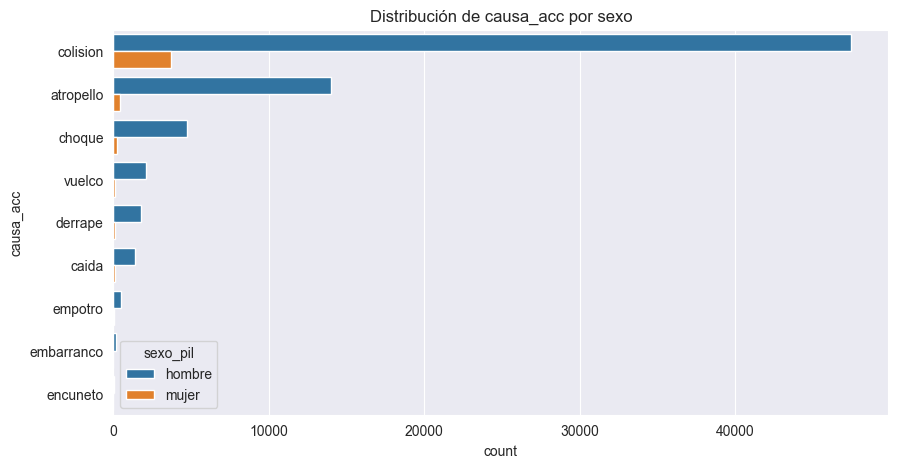

causa_acc   sexo_pil
atropello   hombre      0.969115
            mujer       0.030885
caida       hombre      0.950384
            mujer       0.049616
choque      hombre      0.948503
            mujer       0.051497
colision    hombre      0.927927
            mujer       0.072073
derrape     hombre      0.946515
            mujer       0.053485
embarranco  hombre      0.962500
            mujer       0.037500
empotro     hombre      0.948240
            mujer       0.051760
encuneto    hombre      0.900000
            mujer       0.100000
vuelco      hombre      0.960496
            mujer       0.039504
Name: proportion, dtype: float64


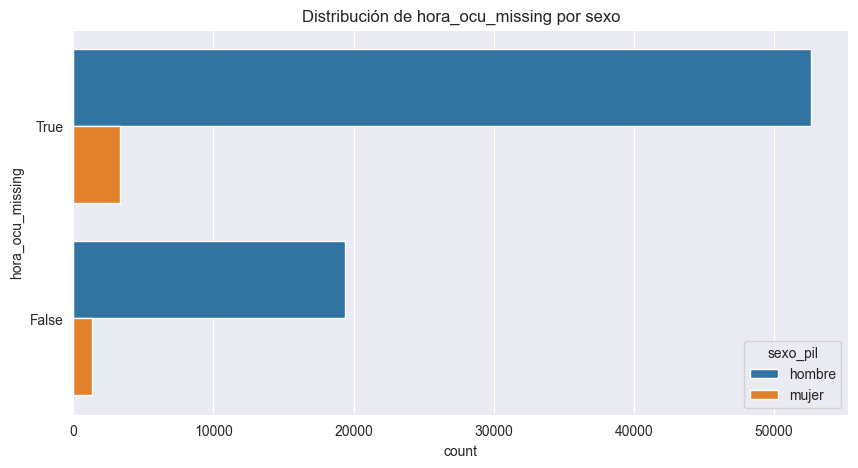

hora_ocu_missing  sexo_pil
False             hombre      0.934868
                  mujer       0.065132
True              hombre      0.940561
                  mujer       0.059439
Name: proportion, dtype: float64


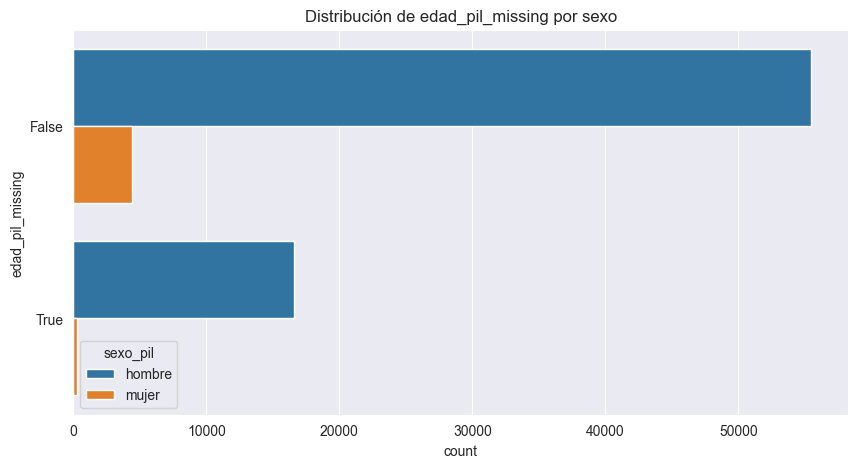

edad_pil_missing  sexo_pil
False             hombre      0.926059
                  mujer       0.073941
True              hombre      0.985106
                  mujer       0.014894
Name: proportion, dtype: float64


In [23]:
# Categorical variables
for col in categorical:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, y=col, hue='sexo_pil', order=df[col].value_counts().index)
    plt.title(f'Distribución de {col} por sexo')
    plt.show()
    print(df.groupby(col)['sexo_pil'].value_counts(normalize=True).sort_index())

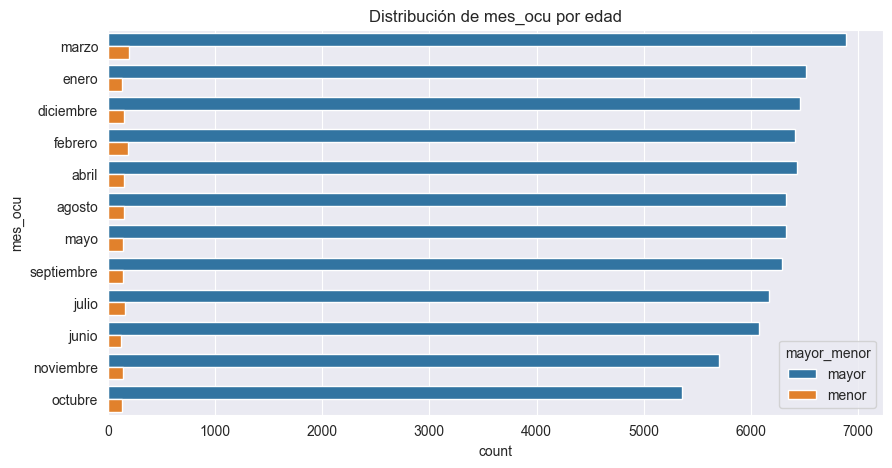

mes_ocu     mayor_menor
abril       mayor          0.976758
            menor          0.023242
agosto      mayor          0.976246
            menor          0.023754
diciembre   mayor          0.977297
            menor          0.022703
enero       mayor          0.980138
            menor          0.019862
febrero     mayor          0.971680
            menor          0.028320
julio       mayor          0.974712
            menor          0.025288
junio       mayor          0.980307
            menor          0.019693
marzo       mayor          0.971920
            menor          0.028080
mayo        mayor          0.978651
            menor          0.021349
noviembre   mayor          0.975860
            menor          0.024140
octubre     mayor          0.975264
            menor          0.024736
septiembre  mayor          0.978386
            menor          0.021614
Name: proportion, dtype: float64


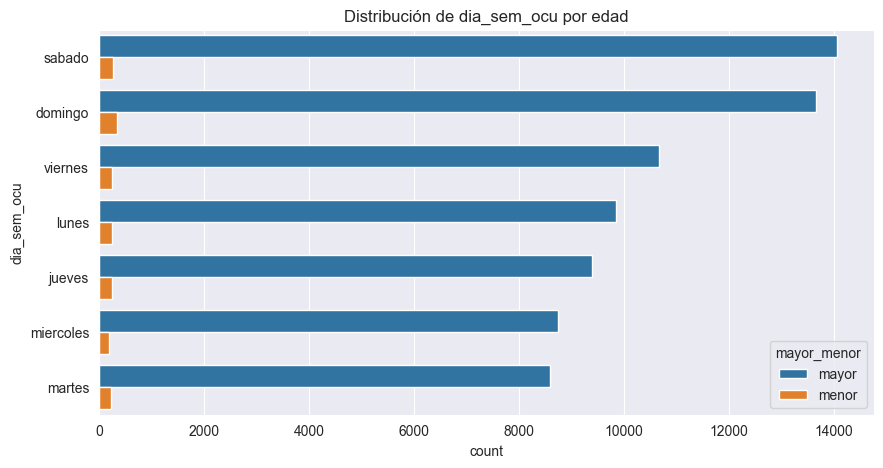

dia_sem_ocu  mayor_menor
domingo      mayor          0.975767
             menor          0.024233
jueves       mayor          0.974803
             menor          0.025197
lunes        mayor          0.974369
             menor          0.025631
martes       mayor          0.973148
             menor          0.026852
miercoles    mayor          0.977728
             menor          0.022272
sabado       mayor          0.980469
             menor          0.019531
viernes      mayor          0.976761
             menor          0.023239
Name: proportion, dtype: float64


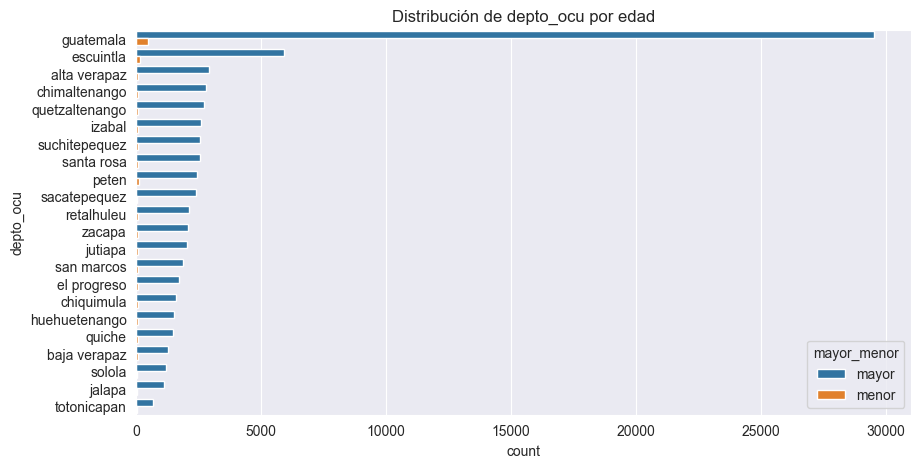

depto_ocu       mayor_menor
alta verapaz    mayor          0.971723
                menor          0.028277
baja verapaz    mayor          0.951017
                menor          0.048983
chimaltenango   mayor          0.972067
                menor          0.027933
chiquimula      mayor          0.964891
                menor          0.035109
el progreso     mayor          0.970208
                menor          0.029792
escuintla       mayor          0.977870
                menor          0.022130
guatemala       mayor          0.984670
                menor          0.015330
huehuetenango   mayor          0.967012
                menor          0.032988
izabal          mayor          0.970621
                menor          0.029379
jalapa          mayor          0.962996
                menor          0.037004
jutiapa         mayor          0.966207
                menor          0.033793
peten           mayor          0.957329
                menor          0.042671
quetzaltenan

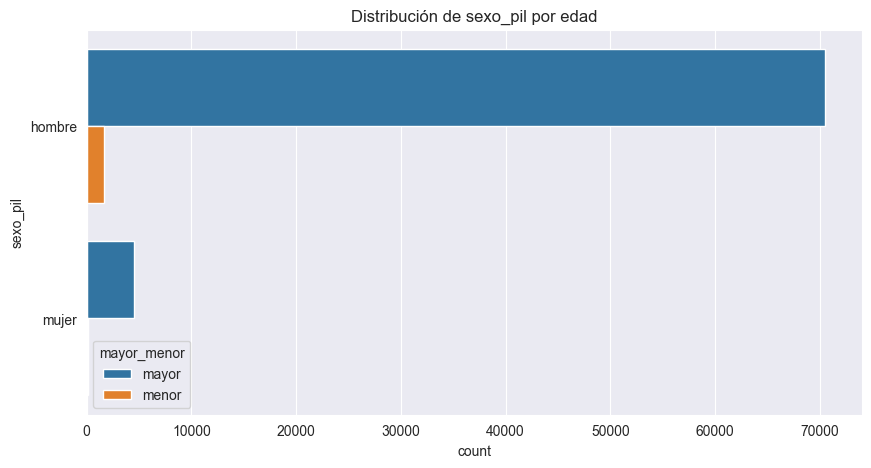

sexo_pil  mayor_menor
hombre    mayor          0.977193
          menor          0.022807
mujer     mayor          0.964324
          menor          0.035676
Name: proportion, dtype: float64


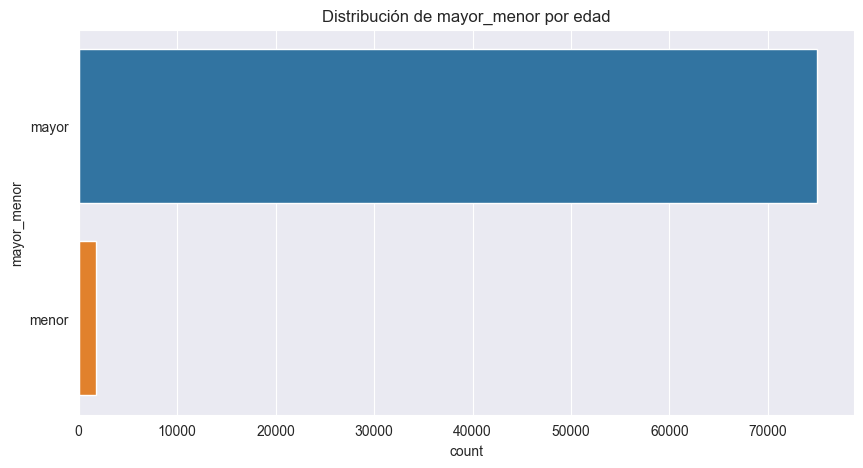

mayor_menor
mayor    1.0
menor    1.0
Name: proportion, dtype: float64


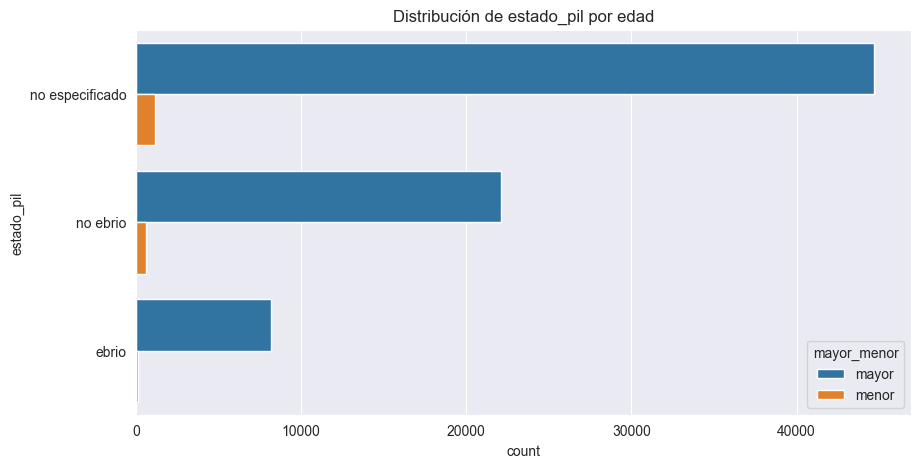

estado_pil       mayor_menor
ebrio            mayor          0.987771
                 menor          0.012229
no ebrio         mayor          0.974039
                 menor          0.025961
no especificado  mayor          0.975534
                 menor          0.024466
Name: proportion, dtype: float64


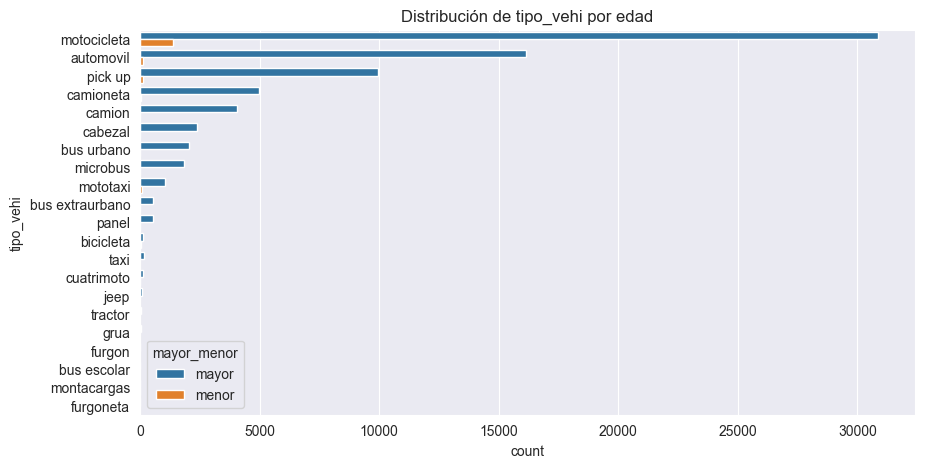

tipo_vehi        mayor_menor
automovil        mayor          0.993291
                 menor          0.006709
bicicleta        mayor          0.853333
                 menor          0.146667
bus escolar      mayor          1.000000
bus extraurbano  mayor          0.996377
                 menor          0.003623
bus urbano       mayor          0.998048
                 menor          0.001952
cabezal          mayor          0.999162
                 menor          0.000838
camion           mayor          0.996074
                 menor          0.003926
camioneta        mayor          0.990423
                 menor          0.009577
cuatrimoto       mayor          0.862595
                 menor          0.137405
furgon           mayor          1.000000
furgoneta        mayor          1.000000
grua             mayor          1.000000
jeep             mayor          1.000000
microbus         mayor          0.995664
                 menor          0.004336
montacargas      mayor      

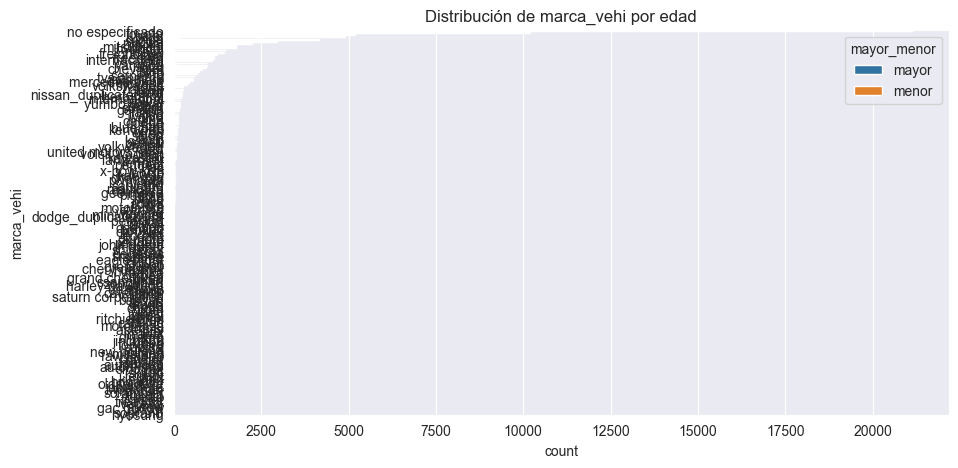

marca_vehi   mayor_menor
acura        mayor          1.000000
ahm          mayor          0.956989
             menor          0.043011
ape city     mayor          1.000000
asia hero    mayor          0.970018
                              ...   
yiben        mayor          1.000000
yumbo dakar  mayor          0.957672
             menor          0.042328
zongshen     mayor          1.000000
zx auto      mayor          1.000000
Name: proportion, Length: 244, dtype: float64


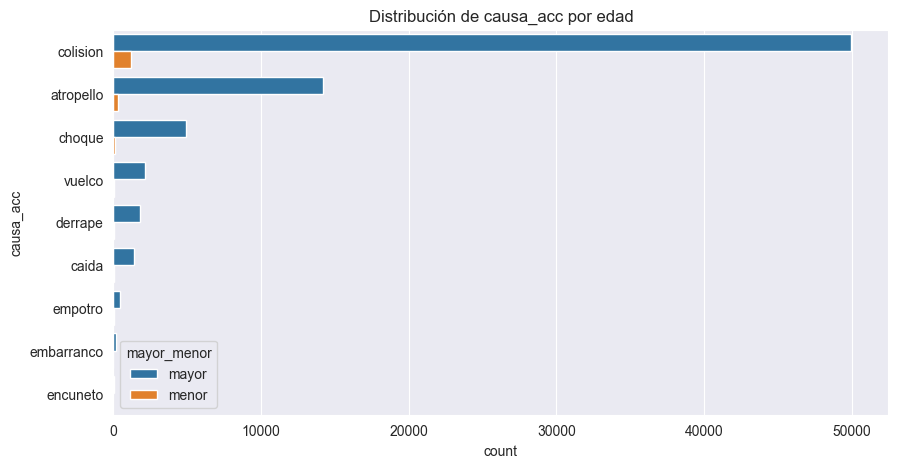

causa_acc   mayor_menor
atropello   mayor          0.979134
            menor          0.020866
caida       mayor          0.953180
            menor          0.046820
choque      mayor          0.978044
            menor          0.021956
colision    mayor          0.976607
            menor          0.023393
derrape     mayor          0.963803
            menor          0.036197
embarranco  mayor          0.987500
            menor          0.012500
empotro     mayor          0.981366
            menor          0.018634
encuneto    mayor          1.000000
vuelco      mayor          0.973817
            menor          0.026183
Name: proportion, dtype: float64


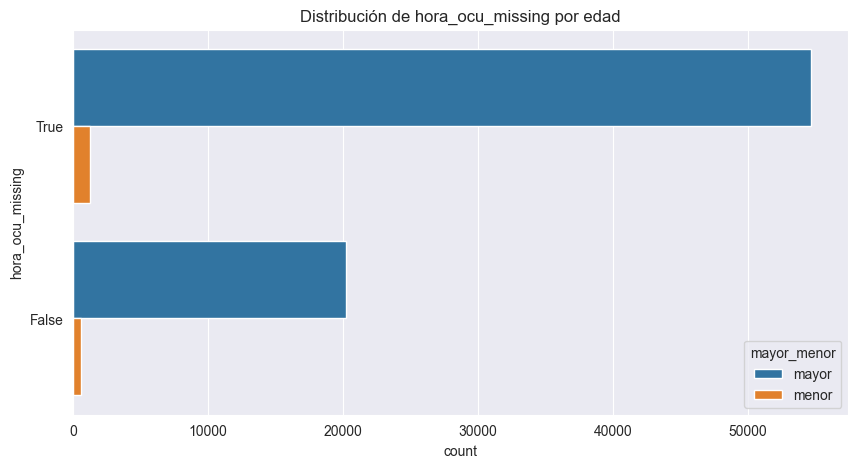

hora_ocu_missing  mayor_menor
False             mayor          0.974179
                  menor          0.025821
True              mayor          0.977235
                  menor          0.022765
Name: proportion, dtype: float64


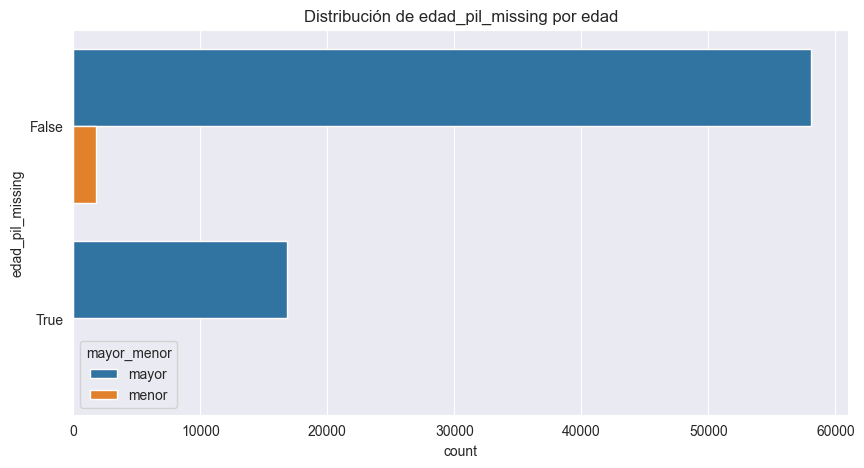

edad_pil_missing  mayor_menor
False             mayor          0.969773
                  menor          0.030227
True              mayor          1.000000
Name: proportion, dtype: float64


In [24]:
# Categorical variables
for col in categorical:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, y=col, hue='mayor_menor', order=df[col].value_counts().index)
    plt.title(f'Distribución de {col} por edad')
    plt.show()
    print(df.groupby(col)['mayor_menor'].value_counts(normalize=True).sort_index())

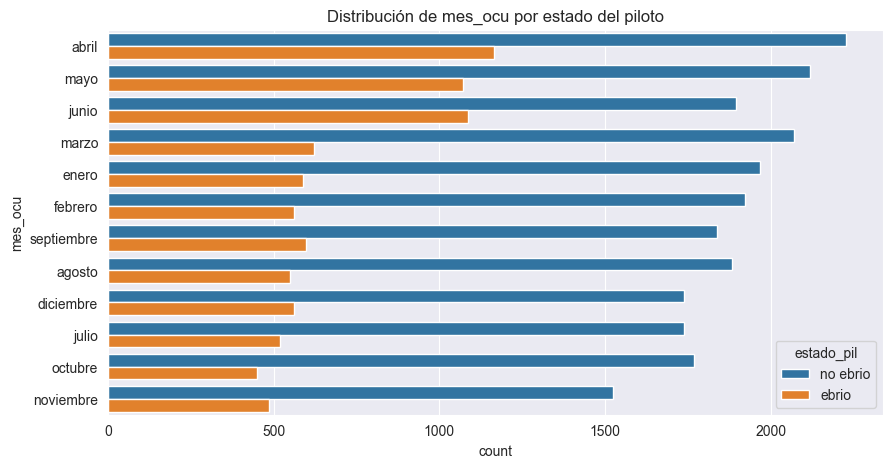

mes_ocu     estado_pil
abril       ebrio         0.343262
            no ebrio      0.656738
agosto      ebrio         0.225422
            no ebrio      0.774578
diciembre   ebrio         0.244348
            no ebrio      0.755652
enero       ebrio         0.230649
            no ebrio      0.769351
febrero     ebrio         0.226651
            no ebrio      0.773349
julio       ebrio         0.229712
            no ebrio      0.770288
junio       ebrio         0.364430
            no ebrio      0.635570
marzo       ebrio         0.230684
            no ebrio      0.769316
mayo        ebrio         0.336050
            no ebrio      0.663950
noviembre   ebrio         0.241671
            no ebrio      0.758329
octubre     ebrio         0.203153
            no ebrio      0.796847
septiembre  ebrio         0.245585
            no ebrio      0.754415
Name: proportion, dtype: float64


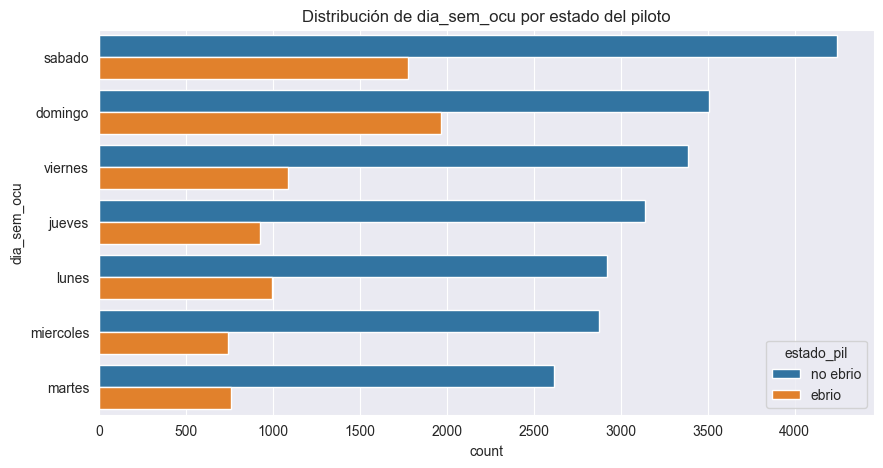

dia_sem_ocu  estado_pil
domingo      ebrio         0.359700
             no ebrio      0.640300
jueves       ebrio         0.227720
             no ebrio      0.772280
lunes        ebrio         0.254086
             no ebrio      0.745914
martes       ebrio         0.224689
             no ebrio      0.775311
miercoles    ebrio         0.205744
             no ebrio      0.794256
sabado       ebrio         0.295115
             no ebrio      0.704885
viernes      ebrio         0.243412
             no ebrio      0.756588
Name: proportion, dtype: float64


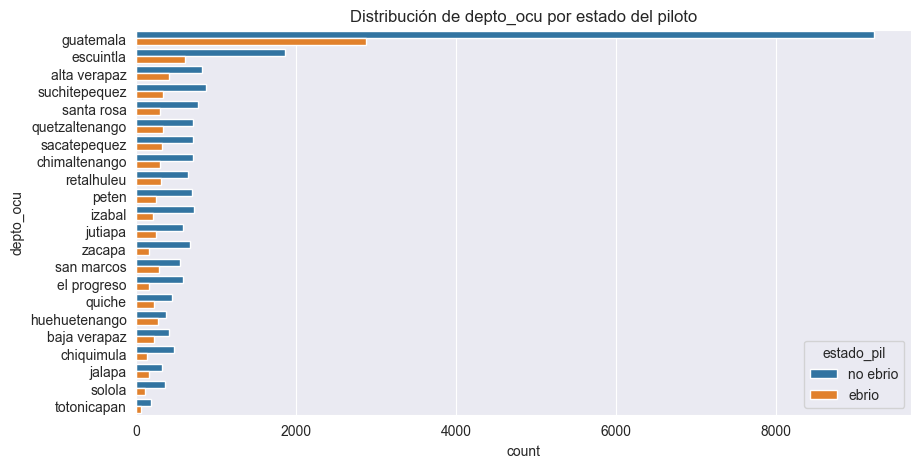

depto_ocu       estado_pil
alta verapaz    ebrio         0.335232
                no ebrio      0.664768
baja verapaz    ebrio         0.354430
                no ebrio      0.645570
chimaltenango   ebrio         0.294643
                no ebrio      0.705357
chiquimula      ebrio         0.225166
                no ebrio      0.774834
el progreso     ebrio         0.211096
                no ebrio      0.788904
escuintla       ebrio         0.247573
                no ebrio      0.752427
guatemala       ebrio         0.237564
                no ebrio      0.762436
huehuetenango   ebrio         0.420970
                no ebrio      0.579030
izabal          ebrio         0.222937
                no ebrio      0.777063
jalapa          ebrio         0.334025
                no ebrio      0.665975
jutiapa         ebrio         0.290012
                no ebrio      0.709988
peten           ebrio         0.265263
                no ebrio      0.734737
quetzaltenango  ebrio         0.31818

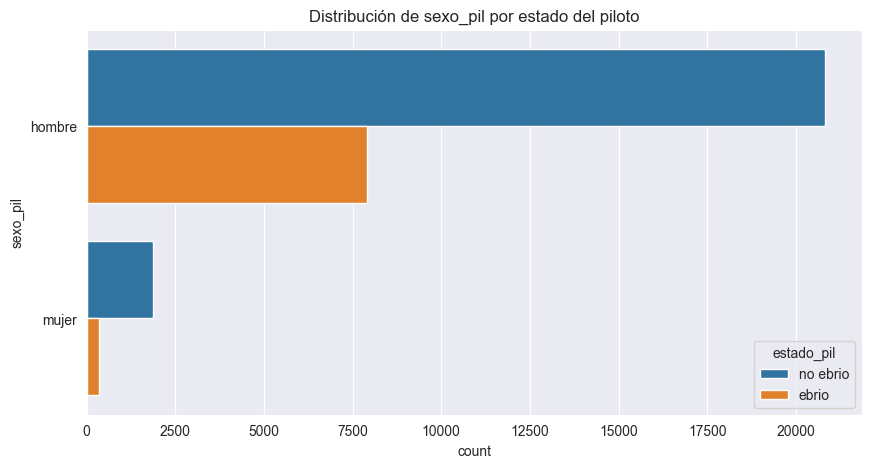

sexo_pil  estado_pil
hombre    ebrio         0.275055
          no ebrio      0.724945
mujer     ebrio         0.162054
          no ebrio      0.837946
Name: proportion, dtype: float64


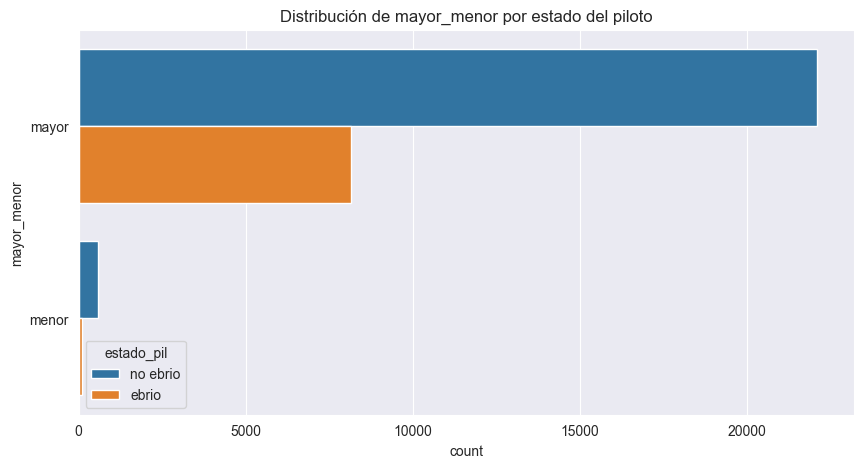

mayor_menor  estado_pil
mayor        ebrio         0.269624
             no ebrio      0.730376
menor        ebrio         0.146377
             no ebrio      0.853623
Name: proportion, dtype: float64


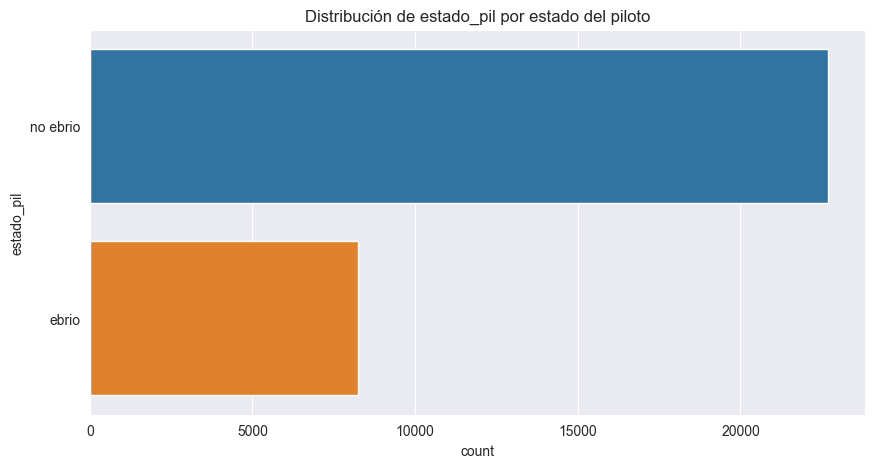

estado_pil
ebrio       1.0
no ebrio    1.0
Name: proportion, dtype: float64


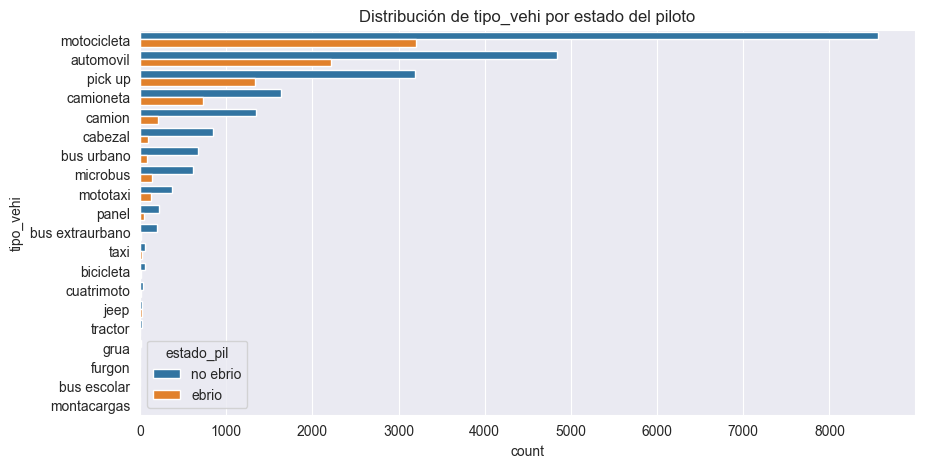

tipo_vehi        estado_pil
automovil        ebrio         0.314468
                 no ebrio      0.685532
bicicleta        ebrio         0.098361
                 no ebrio      0.901639
bus escolar      no ebrio      1.000000
bus extraurbano  ebrio         0.074766
                 no ebrio      0.925234
bus urbano       ebrio         0.106860
                 no ebrio      0.893140
cabezal          ebrio         0.095643
                 no ebrio      0.904357
camion           ebrio         0.137154
                 no ebrio      0.862846
camioneta        ebrio         0.307627
                 no ebrio      0.692373
cuatrimoto       ebrio         0.307692
                 no ebrio      0.692308
furgon           no ebrio      1.000000
grua             ebrio         0.111111
                 no ebrio      0.888889
jeep             ebrio         0.446809
                 no ebrio      0.553191
microbus         ebrio         0.178284
                 no ebrio      0.821716
montacargas 

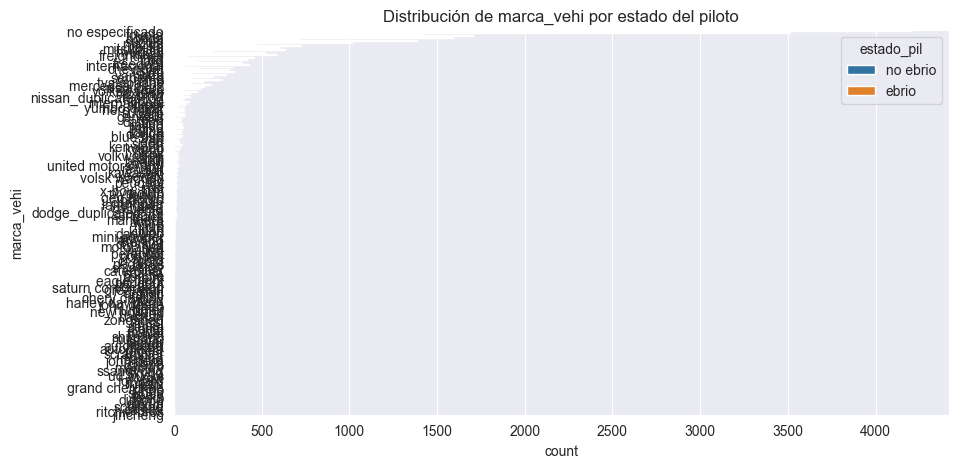

marca_vehi   estado_pil
acura        ebrio         0.363636
             no ebrio      0.636364
ahm          ebrio         0.257143
             no ebrio      0.742857
asia hero    ebrio         0.296748
                             ...   
yumbo dakar  no ebrio      0.750000
zongshen     ebrio         0.500000
             no ebrio      0.500000
zx auto      ebrio         0.250000
             no ebrio      0.750000
Name: proportion, Length: 270, dtype: float64


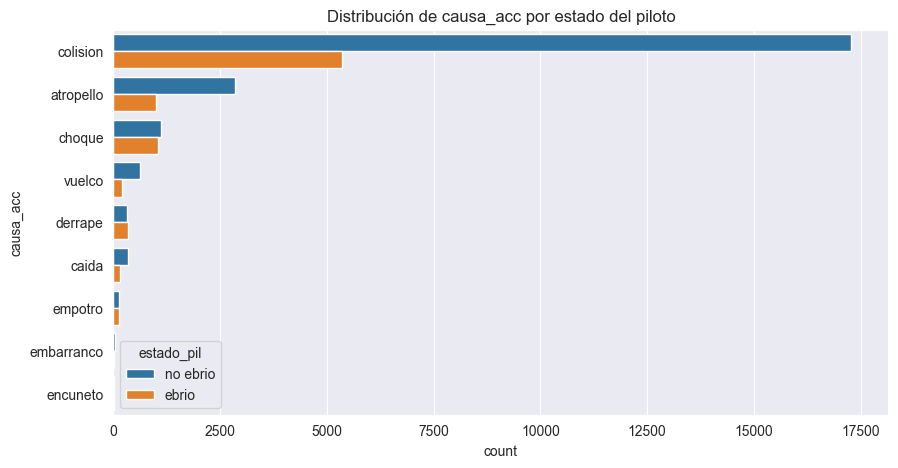

causa_acc   estado_pil
atropello   ebrio         0.261016
            no ebrio      0.738984
caida       ebrio         0.326653
            no ebrio      0.673347
choque      ebrio         0.486111
            no ebrio      0.513889
colision    ebrio         0.236123
            no ebrio      0.763877
derrape     ebrio         0.517751
            no ebrio      0.482249
embarranco  ebrio         0.225000
            no ebrio      0.775000
empotro     ebrio         0.482213
            no ebrio      0.517787
encuneto    ebrio         0.571429
            no ebrio      0.428571
vuelco      ebrio         0.255448
            no ebrio      0.744552
Name: proportion, dtype: float64


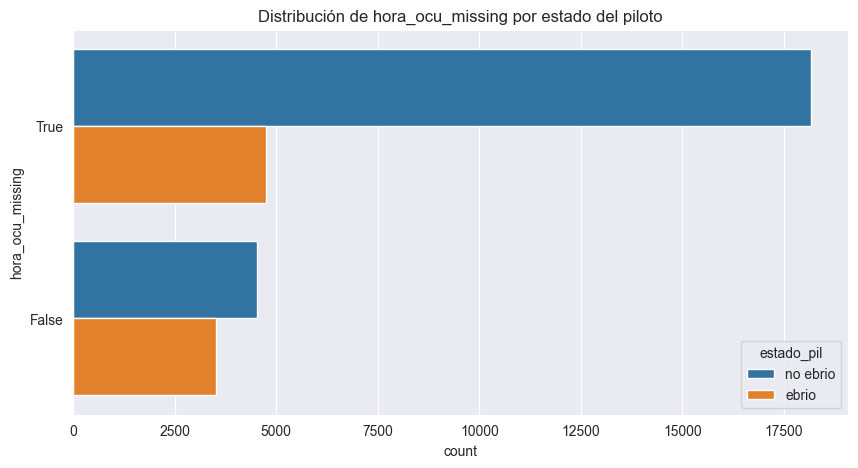

hora_ocu_missing  estado_pil
False             ebrio         0.437282
                  no ebrio      0.562718
True              ebrio         0.207267
                  no ebrio      0.792733
Name: proportion, dtype: float64


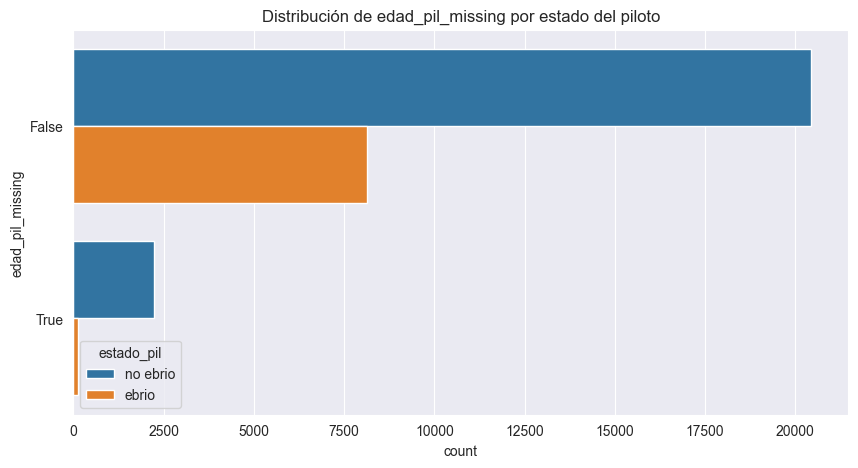

edad_pil_missing  estado_pil
False             ebrio         0.284669
                  no ebrio      0.715331
True              ebrio         0.052321
                  no ebrio      0.947679
Name: proportion, dtype: float64


In [25]:
for col in categorical:
    # Filter out 'no especificado' rows
    df_filtered = df.loc[df['estado_pil'] != 'no especificado']

    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_filtered, y=col, hue='estado_pil', order=df_filtered[col].value_counts().index)
    plt.title(f'Distribución de {col} por estado del piloto')
    plt.show()
    print(df_filtered.groupby(col)['estado_pil'].value_counts(normalize=True).sort_index())

### Encoding
Las características que utilizarán _ordinal\_encoding_ son: 'mes_ocu', 'dia_sem_ocu', 'depto_ocu', 'tipo_vehi', 'marca_vehi',

In [26]:
df.head()

,dia_ocu,mes_ocu,dia_sem_ocu,hora_ocu,depto_ocu,sexo_pil,edad_pil,mayor_menor,estado_pil,tipo_vehi,marca_vehi,causa_acc,year,hora_ocu_missing,edad_pil_missing
0,27,junio,lunes,19.0,guatemala,hombre,42.0,mayor,no ebrio,automovil,audi,colision,2011,True,False
1,18,septiembre,domingo,19.0,guatemala,hombre,25.0,mayor,ebrio,automovil,audi,empotro,2011,True,False
2,5,octubre,miercoles,19.0,quetzaltenango,hombre,26.0,mayor,ebrio,automovil,audi,colision,2011,True,False
3,15,febrero,martes,19.0,izabal,hombre,59.0,mayor,no especificado,camioneta,land rover,colision,2011,True,False
4,17,junio,viernes,19.0,guatemala,mujer,25.0,mayor,no ebrio,camioneta,land rover,colision,2011,True,False


In [16]:
# Manual mapping to keep the order
mes_ocu_cat = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
mes_ocu_mapping = {month: i+1 for i, month in enumerate(mes_ocu_cat)}
df['mes_ocu'] = df['mes_ocu'].map(mes_ocu_mapping)

dia_sem_ocu_cat = ['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo']
dia_sem_ocu_mapping = {day: i+1 for i, day in enumerate(dia_sem_ocu_cat)}
df['dia_sem_ocu'] = df['dia_sem_ocu'].map(dia_sem_ocu_mapping)

In [17]:
ordinal_encoder = OrdinalEncoder()

In [18]:
# Ordinal encoding
use_ordinal = [
    'depto_ocu', 
    'tipo_vehi', 
    'marca_vehi'
]
df[use_ordinal] = ordinal_encoder.fit_transform(df[use_ordinal])

In [19]:
# To be later used as analysis
df_copy = df.copy()

In [20]:
# One hot is the difference of all the categorical columns and the ones that are going to be ordinal encoded
use_onehot = list(set(categorical) - set(use_ordinal) - {'mes_ocu', 'dia_sem_ocu', 'hora_ocu_missing', 'edad_pil_missing'})

# One hot encoding
df = pd.get_dummies(df, columns=use_onehot)

In [21]:
# If the column type is bool, turn to int
for col in df.select_dtypes(include=['bool']).columns:
    df[col] = df[col].astype(int)

In [22]:
parse_bool_map = {
    'True': 1,
    'False': 0
}
df['hora_ocu_missing'] = df['hora_ocu_missing'].map(parse_bool_map)
df['edad_pil_missing'] = df['edad_pil_missing'].map(parse_bool_map)
df['hora_ocu_missing'] = df['hora_ocu_missing'].astype(int)
df['edad_pil_missing'] = df['edad_pil_missing'].astype(int)

### Correlación

<Axes: >

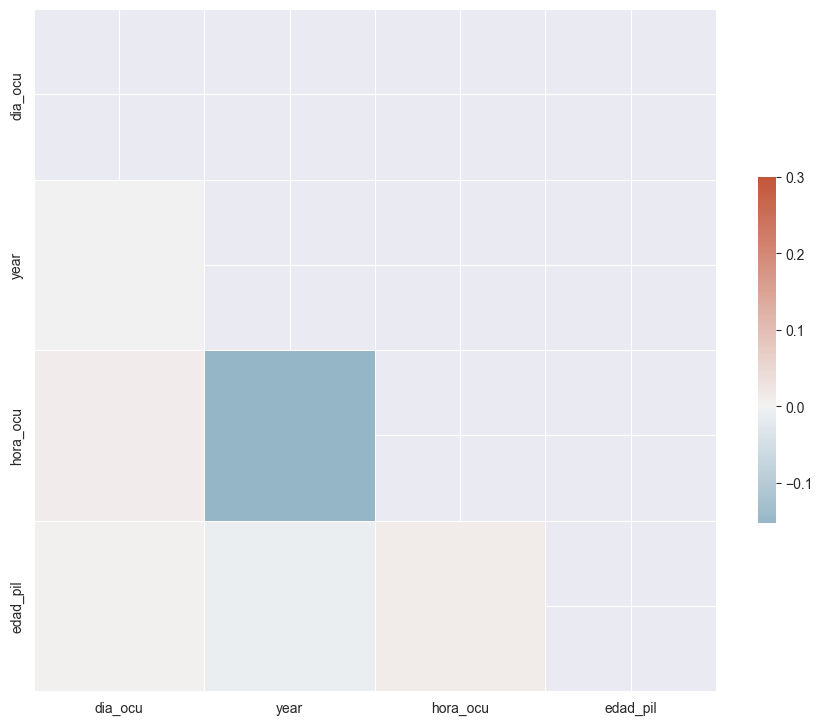

In [34]:
corr_matrix = df[numerical].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

No hay correlación entre variables numéricas

## Scaling

In [23]:
scaler = StandardScaler()

In [24]:
# All the columns that are either int or float
to_scale = df.select_dtypes(include=['int64', 'float64']).columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76765 entries, 0 to 76791
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   dia_ocu                     76765 non-null  int64  
 1   mes_ocu                     76765 non-null  int64  
 2   dia_sem_ocu                 76765 non-null  int64  
 3   hora_ocu                    76765 non-null  float64
 4   depto_ocu                   76765 non-null  float64
 5   edad_pil                    76765 non-null  float64
 6   tipo_vehi                   76765 non-null  float64
 7   marca_vehi                  76765 non-null  float64
 8   year                        76765 non-null  int64  
 9   hora_ocu_missing            76765 non-null  int32  
 10  edad_pil_missing            76765 non-null  int32  
 11  causa_acc_atropello         76765 non-null  int32  
 12  causa_acc_caida             76765 non-null  int32  
 13  causa_acc_choque            76765 no

In [25]:
scaled_df = df.copy()
scaled_df[to_scale] = scaler.fit_transform(scaled_df[to_scale])

In [38]:
scaled_df.head()

,dia_ocu,mes_ocu,dia_sem_ocu,hora_ocu,depto_ocu,edad_pil,tipo_vehi,marca_vehi,year,hora_ocu_missing,...,causa_acc_caida,causa_acc_choque,causa_acc_colision,causa_acc_derrape,causa_acc_embarranco,causa_acc_empotro,causa_acc_encuneto,causa_acc_vuelco,sexo_pil_hombre,sexo_pil_mujer
0,1.291886,-0.108749,-1.623113,0.335059,-0.457617,0.905398,-1.563973,-2.057137,-2.213776,1,...,0,0,1,0,0,0,0,0,1,0
1,0.269900,0.758074,1.309048,0.335059,-0.457617,-0.676989,-1.563973,-2.057137,-2.213776,1,...,0,0,0,0,0,1,0,0,1,0
2,-1.206303,1.047015,-0.645726,0.335059,0.679500,-0.583907,-1.563973,-2.057137,-2.213776,1,...,0,0,1,0,0,0,0,0,1,0
3,-0.070763,-1.264512,-1.134420,0.335059,-0.078578,2.487785,-0.518687,-0.185932,-2.213776,1,...,0,0,1,0,0,0,0,0,1,0
4,0.156346,-0.108749,0.331661,0.335059,-0.457617,-0.676989,-0.518687,-0.185932,-2.213776,1,...,0,0,1,0,0,0,0,0,0,1


## Clustering

Buscamos el mejor número de clusters

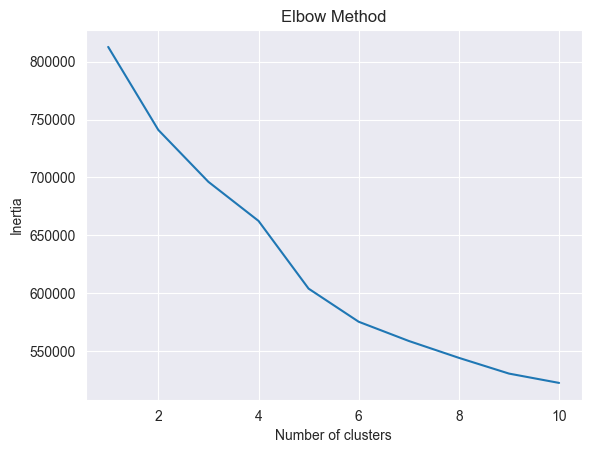

In [39]:
# Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=seed)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

El método del codo no es claro, por lo que se procede a utilizar el método de la silueta

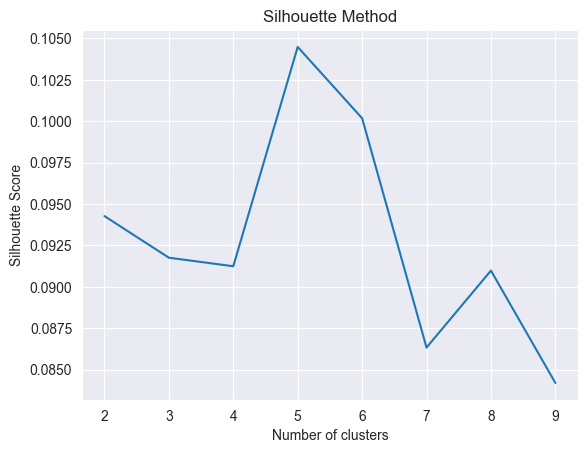

In [40]:
from sklearn.metrics import silhouette_score

silhouette = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=seed)
    kmeans.fit(scaled_df)
    silhouette.append(silhouette_score(scaled_df, kmeans.labels_))
    
plt.plot(range(2, 10), silhouette)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Procedemos a utilizar 5 clusters

In [26]:
kmeans = KMeans(n_clusters=5, random_state=seed)
kmeans.fit(scaled_df)

KMeans(n_clusters=5, random_state=2024)

In [42]:
silhouette_score = silhouette_score(scaled_df, kmeans.labels_)
print(f'Silhouette Score: {silhouette_score}')

Silhouette Score: 0.10448472376557703


In [27]:
# Add the cluster to the original dataframe
scaled_df['cluster'] = kmeans.labels_
df['cluster'] = kmeans.labels_
df_copy['cluster'] = kmeans.labels_

In [44]:
df.head()

,dia_ocu,mes_ocu,dia_sem_ocu,hora_ocu,depto_ocu,edad_pil,tipo_vehi,marca_vehi,year,hora_ocu_missing,...,causa_acc_choque,causa_acc_colision,causa_acc_derrape,causa_acc_embarranco,causa_acc_empotro,causa_acc_encuneto,causa_acc_vuelco,sexo_pil_hombre,sexo_pil_mujer,cluster
0,27,6,1,19.0,6.0,42.0,0.0,4.0,2011,1,...,0,1,0,0,0,0,0,1,0,1
1,18,9,7,19.0,6.0,25.0,0.0,4.0,2011,1,...,0,0,0,0,1,0,0,1,0,1
2,5,10,3,19.0,12.0,26.0,0.0,4.0,2011,1,...,0,1,0,0,0,0,0,1,0,1
3,15,2,2,19.0,8.0,59.0,7.0,90.0,2011,1,...,0,1,0,0,0,0,0,1,0,0
4,17,6,5,19.0,6.0,25.0,7.0,90.0,2011,1,...,0,1,0,0,0,0,0,0,1,1


### Visualización, análisis y calidad de los clusters

In [45]:
centroides = kmeans.cluster_centers_
columnas_importantes_por_cluster = {}
for i, centroide in enumerate(centroides):
    columnas_importantes = np.argsort(centroide)[::-1][:6]
    columnas_importantes_por_cluster[f'Cluster {i+1}'] = columnas_importantes

print("Reporte de las columnas más importantes por cluster:")
for cluster, columnas in columnas_importantes_por_cluster.items():
    print(f"Cluster {cluster}:")
    for columna in columnas:
        print(f"   - {df.columns[columna]}")


Reporte de las columnas más importantes por cluster:
Cluster Cluster 1:
   - edad_pil
   - mayor_menor_mayor
   - sexo_pil_hombre
   - hora_ocu_missing
   - causa_acc_colision
   - estado_pil_no especificado
Cluster Cluster 2:
   - mayor_menor_mayor
   - sexo_pil_hombre
   - hora_ocu_missing
   - causa_acc_colision
   - estado_pil_no especificado
   - hora_ocu
Cluster Cluster 3:
   - mayor_menor_mayor
   - sexo_pil_hombre
   - hora_ocu_missing
   - causa_acc_colision
   - tipo_vehi
   - estado_pil_no especificado
Cluster Cluster 4:
   - mayor_menor_mayor
   - sexo_pil_hombre
   - hora_ocu_missing
   - tipo_vehi
   - marca_vehi
   - estado_pil_no especificado
Cluster Cluster 5:
   - mayor_menor_mayor
   - sexo_pil_hombre
   - estado_pil_no especificado
   - causa_acc_colision
   - year
   - edad_pil_missing


In [46]:
observaciones_por_cluster = {}
for i, cluster_label in enumerate(kmeans.labels_):
    if cluster_label not in observaciones_por_cluster:
        observaciones_por_cluster[cluster_label] = []
    observaciones_por_cluster[cluster_label].append(df.iloc[i])

medias_por_cluster = {}
for cluster_label, observaciones in observaciones_por_cluster.items():
    medias_por_cluster[cluster_label] = pd.DataFrame(observaciones).mean()

for cluster_label, medias in medias_por_cluster.items():
    print(f"Cluster {cluster_label}:")
    print(medias)
    print()


Cluster 1:
dia_ocu                         15.593273
mes_ocu                          6.585045
dia_sem_ocu                      4.425829
hora_ocu                        18.887264
depto_ocu                        8.005966
edad_pil                        30.828947
tipo_vehi                        2.079007
marca_vehi                     100.320454
year                          2016.891209
hora_ocu_missing                 0.830727
edad_pil_missing                 0.305875
mayor_menor_mayor                0.992638
mayor_menor_menor                0.007362
estado_pil_ebrio                 0.107780
estado_pil_no ebrio              0.293461
estado_pil_no especificado       0.598759
causa_acc_atropello              0.207381
causa_acc_caida                  0.006977
causa_acc_choque                 0.062214
causa_acc_colision               0.681759
causa_acc_derrape                0.001780
causa_acc_embarranco             0.001828
causa_acc_empotro                0.007747
causa_acc_encuneto     

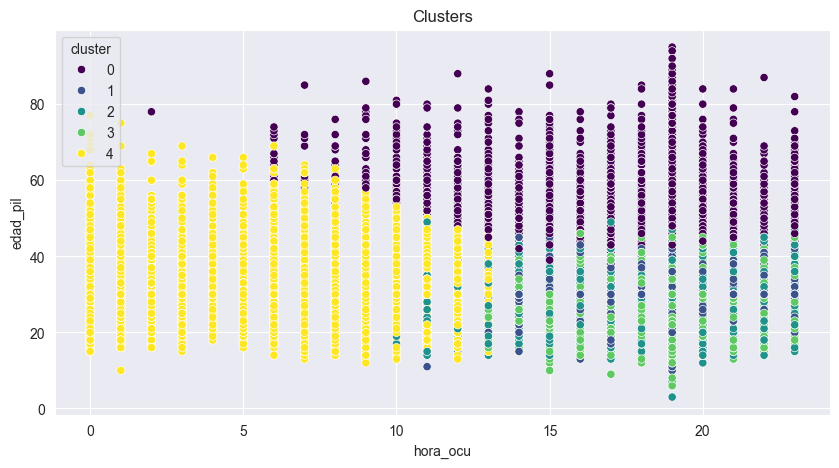

In [47]:
# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='hora_ocu', y='edad_pil', hue='cluster', palette='viridis')
plt.title('Clusters')
plt.show()

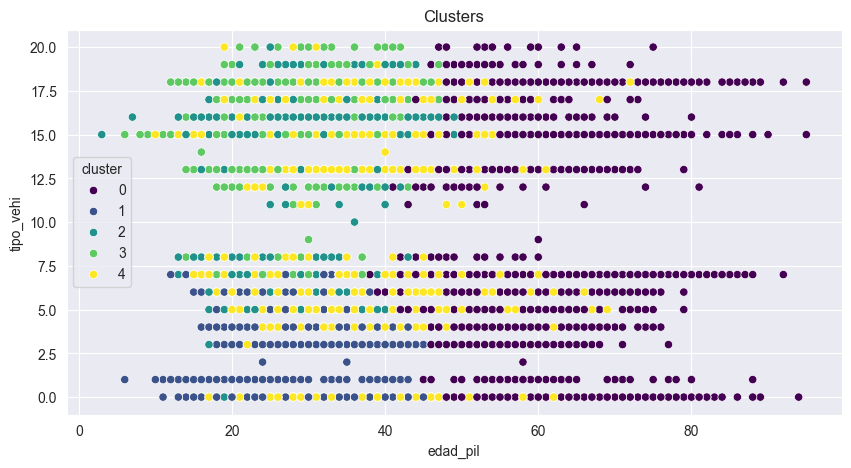

In [48]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='edad_pil', y='tipo_vehi', hue='cluster', palette='viridis')
plt.title('Clusters')
plt.show()

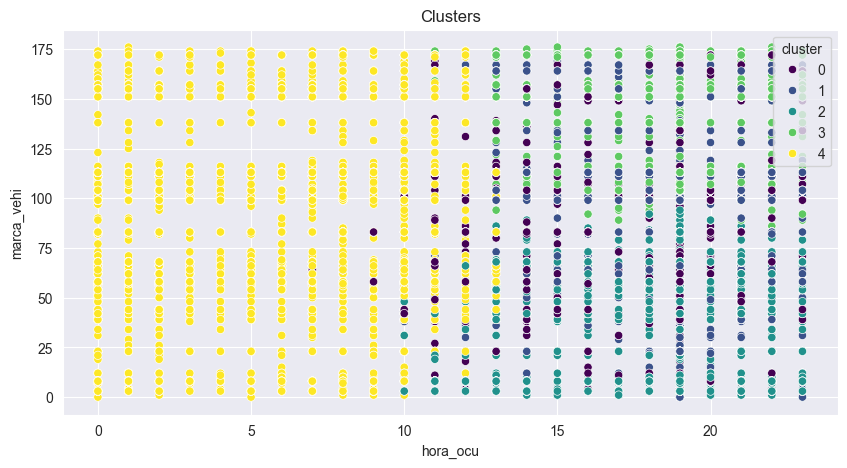

In [49]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='hora_ocu', y='marca_vehi', hue='cluster', palette='viridis')
plt.title('Clusters')
plt.show()

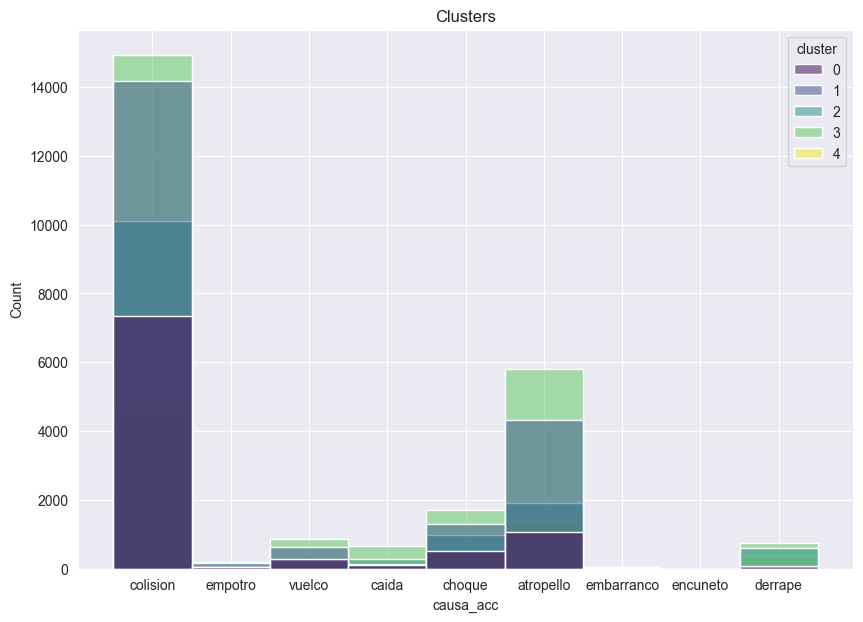

In [50]:
plt.figure(figsize=(10, 7))
sns.histplot(data=df_copy, x='causa_acc', hue='cluster', palette='viridis', bins=30)
plt.title('Clusters')
plt.show()

# Modelos

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [29]:
X = scaled_df.drop(columns=['cluster'])
y = scaled_df['cluster']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

## Verificación del balance de los datos

In [ ]:
X = scaled_df.drop(columns=['cluster'])
y = scaled_df['cluster']

#Dividir los datos con el mismo seed definido previamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [ ]:
#Contar las ocurrencias de cada clase en los datasets original, de entrenamiento y de prueba
distribution_total = y.value_counts(normalize=True)
distribution_train = y_train.value_counts(normalize=True)
distribution_test = y_test.value_counts(normalize=True)

#Crear un DataFrame para una mejor visualización
df_distributions = pd.DataFrame({
    'Total': distribution_total,
    'Train': distribution_train,
    'Test': distribution_test
})

print(df_distributions)


## SVM
Este es útil debido a su capacidad para encontrar límites de decisión óptimos en datos complejos y no lineales.

In [54]:
from sklearn import svm

In [55]:
classes = np.unique(y_train)
classWeights = {}
for c in classes:
    classWeights[c] = len(y_train) / (len(classes) * np.sum(y_train == c))
model = svm.SVC(class_weight= classWeights)

In [56]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf'],
}

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

In [57]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=SVC(class_weight={0: 1.6308042488619119,
                                         1: 0.7390317700453858,
                                         2: 1.0769616194007416,
                                         3: 0.614254686785551,
                                         4: 2.095748829953198}),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

In [58]:
best = grid_search.best_params_
print("Mejores parámetros", best)

Mejores parámetros {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [59]:
best_model = svm.SVC(**best, class_weight=classWeights)
best_model.fit(X_train, y_train)

SVC(C=10,
    class_weight={0: 1.6308042488619119, 1: 0.7390317700453858,
                  2: 1.0769616194007416, 3: 0.614254686785551,
                  4: 2.095748829953198},
    gamma='auto')

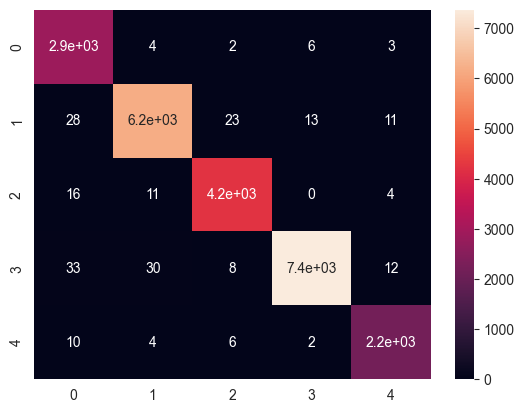

In [69]:
#confussion
sns.heatmap(confusion_matrix(y_test, best_model.predict(X_test)), annot=True)
plt.show()

In [70]:
y_pred = best_model.predict(X_test)

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2886
           1       0.99      0.99      0.99      6241
           2       0.99      0.99      0.99      4259
           3       1.00      0.99      0.99      7454
           4       0.99      0.99      0.99      2190

    accuracy                           0.99     23030
   macro avg       0.99      0.99      0.99     23030
weighted avg       0.99      0.99      0.99     23030



In [73]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9901867129830656


## KNN

Para facilitar la clasificación con los datos que se están trabajando, se utilizará el algoritmo KNN con la distancia de Jaccard. Por lo que es necesario proceder a modificar la forma de los datos para adecuarse a un espacio vectorial boleano.

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
k_range = list(range(2, 16))  # N neighbors
weight_options = ['uniform', 'distance']  # Weight function
metric_options = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']  # Distance metric
param_grid = dict(n_neighbors=k_range, weights=weight_options)

In [63]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [64]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [65]:
print(f'Best score: {grid.best_score_}')
print(f'Best parameters: {grid.best_params_}')

Best score: 0.9483947671201394
Best parameters: {'n_neighbors': 14, 'weights': 'uniform'}


In [77]:
best_knn = KNeighborsClassifier(**grid.best_params_)
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [78]:
y_pred = best_knn.predict(X_test)

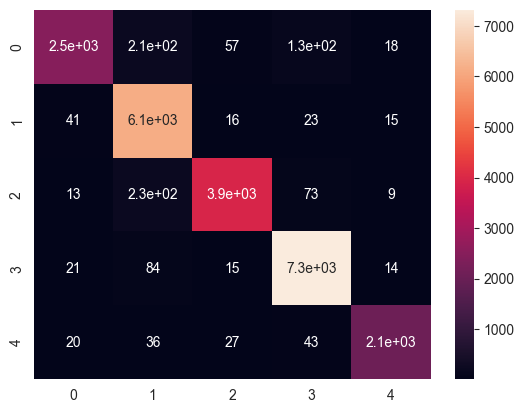

In [79]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2886
           1       0.92      0.98      0.95      6241
           2       0.97      0.92      0.95      4259
           3       0.96      0.98      0.97      7454
           4       0.97      0.94      0.96      2190

    accuracy                           0.95     23030
   macro avg       0.96      0.94      0.95     23030
weighted avg       0.95      0.95      0.95     23030



In [81]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9523664785062962


## Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_tree = GridSearchCV(tree_model, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)

best_tree_params = grid_search_tree.best_params_
print("Mejores parámetros para el árbol de decisión:", best_tree_params)

best_tree_model = DecisionTreeClassifier(**best_tree_params)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores parámetros para el árbol de decisión: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5}


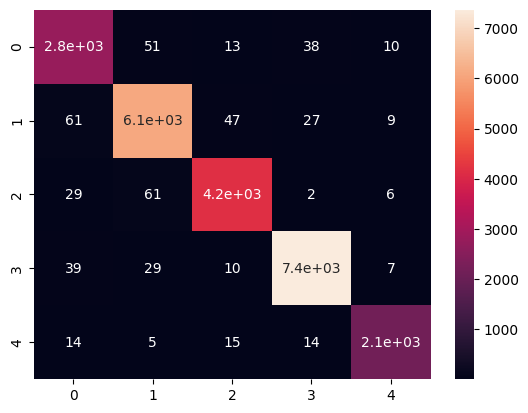

In [33]:
best_tree_model.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, best_tree_model.predict(X_test)), annot=True)
plt.show()

In [34]:
y_pred_tree = best_tree_model.predict(X_test)
print(classification_report(y_test, y_pred_tree))
print(f"Precisión: {accuracy_score(y_test, y_pred_tree)}")

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2886
           1       0.98      0.98      0.98      6241
           2       0.98      0.98      0.98      4259
           3       0.99      0.99      0.99      7454
           4       0.99      0.98      0.98      2190

    accuracy                           0.98     23030
   macro avg       0.98      0.98      0.98     23030
weighted avg       0.98      0.98      0.98     23030

Precisión: 0.9788536691272254
